In [31]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
import itertools
import sys
sys.path.insert(0, '..')
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (14, 9)
plt.rcParams['font.size'] = 16
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import xarray as xr

import covid19

In [33]:
lut_path = 'UID_ISO_FIPS_LookUp_Table.csv'
# lut_path = covid19.data.download('LUT', repo='world')
lut_path

'UID_ISO_FIPS_LookUp_Table.csv'

In [34]:
deaths_path = 'time_series_covid19_deaths_global.csv'
deaths_path = covid19.data.download('deaths', repo='world')
confirmed_path = 'time_series_covid19_confirmed_global.csv'
confirmed_path = covid19.data.download('confirmed', repo='world')
deaths_path, confirmed_path

('time_series_covid19_deaths_global.csv',
 'time_series_covid19_confirmed_global.csv')

In [35]:
world = covid19.data.read_jhu_global(deaths_path, lut_path=lut_path)
# world['confirmed'] = covid19.data.read_jhu_global(confirmed_path)['confirmed']

europe = world.sel(location=['Italy', 'United Kingdom', 'France', 'Spain', 'Belgium', 'Netherlands', 'Sweden', 'Ireland', 'Switzerland', 'Portugal', 'Germany']).sum('location')
europe['daily_deaths'] = europe['deaths'].diff('time')
print(europe)

world['daily_deaths'] = world['deaths'].diff('time')
world['mortality'] = world['deaths'] / world.population * 1_000_000
world['daily_mortality'] = world['daily_deaths'] / world.population * 1_000_000
world['daily_deaths7'] = world['daily_deaths'].rolling({'time': 7}).mean()
world['daily_mortality7'] = world['daily_mortality'].rolling({'time': 7}).mean()
world = world.drop(['lat', 'lon'])
world

<xarray.Dataset>
Dimensions:       (time: 203)
Coordinates:
  * time          (time) datetime64[ns] 2020-01-22 2020-01-23 ... 2020-08-11
Data variables:
    deaths        (time) int64 0 0 0 0 0 ... 176889 176973 176992 177035 170909
    daily_deaths  (time) float64 nan 0.0 0.0 0.0 ... 84.0 19.0 43.0 -6.126e+03


<xarray.Dataset>
Dimensions:           (location: 280, time: 203)
Coordinates:
  * time              (time) datetime64[ns] 2020-01-22 2020-01-23 ... 2020-08-11
    country           (location) <U32 'Afghanistan' 'Albania' ... 'Netherlands'
  * location          (location) <U46 'Afghanistan' ... 'Netherlands / Drenthe'
    state_region      (location) <U46 'Afghanistan / ' ... 'Netherlands / Drenthe'
    population        (location) float64 3.893e+07 2.878e+06 ... nan nan
Data variables:
    deaths            (time, location) int64 0 0 0 0 0 0 ... 685 754 69 0 41
    daily_deaths      (time, location) float64 nan nan nan nan ... 69.0 0.0 41.0
    mortality         (time, location) float64 0.0 0.0 0.0 0.0 ... nan nan nan
    daily_mortality   (time, location) float64 nan nan nan nan ... nan nan nan
    daily_deaths7     (time, location) float64 nan nan nan ... 9.857 0.0 5.857
    daily_mortality7  (time, location) float64 nan nan nan nan ... nan nan nan

In [36]:
world_latest = world.isel(time=-1)
world_latest = world_latest.sortby(-world_latest['daily_mortality7'])
world_latest.sortby(-world_latest['mortality']).to_dataframe().reset_index().head(50)

location       time                 country  \
0               San Marino 2020-08-11              San Marino   
1                  Belgium 2020-08-11                 Belgium   
2           United Kingdom 2020-08-11          United Kingdom   
3                  Andorra 2020-08-11                 Andorra   
4                     Peru 2020-08-11                    Peru   
5                    Spain 2020-08-11                   Spain   
6                    Italy 2020-08-11                   Italy   
7                   Sweden 2020-08-11                  Sweden   
8                    Chile 2020-08-11                   Chile   
9                       US 2020-08-11                      US   
10                  Brazil 2020-08-11                  Brazil   
11                  France 2020-08-11                  France   
12                  Mexico 2020-08-11                  Mexico   
13                  Panama 2020-08-11                  Panama   
14                 Ireland 2020-08-11                 Ireland   
15                 Ecuador 2020-08-11                 Ecuador   
16                 Bolivia 2020-08-11                 Bolivia   
17                 Armenia 2020-08-11                 Armenia   
18                Colombia 2020-08-11                Colombia   
19         North Macedonia 2020-08-11         North Macedonia   
20             Switzerland 2020-08-11             Switzerland   
21              Kyrgyzstan 2020-08-11              Kyrgyzstan   
22                    Iran 2020-08-11                    Iran   
23                 Moldova 2020-08-11                 Moldova   
24              Luxembourg 2020-08-11              Luxembourg   
25                  Kosovo 2020-08-11                  Kosovo   
26            South Africa 2020-08-11            South Africa   
27                Portugal 2020-08-11                Portugal   
28                Honduras 2020-08-11                Honduras   
29                 Romania 2020-08-11                 Romania   
30                    Iraq 2020-08-11                    Iraq   
31  Bosnia and Herzegovina 2020-08-11  Bosnia and Herzegovina   
32               Guatemala 2020-08-11               Guatemala   
33      Dominican Republic 2020-08-11      Dominican Republic   
34                  Kuwait 2020-08-11                  Kuwait   
35              Montenegro 2020-08-11              Montenegro   
36               Argentina 2020-08-11               Argentina   
37                 Germany 2020-08-11                 Germany   
38                 Denmark 2020-08-11                 Denmark   
39                    Oman 2020-08-11                    Oman   
40                  Russia 2020-08-11                  Russia   
41                  Monaco 2020-08-11                  Monaco   
42                 Bahrain 2020-08-11                 Bahrain   
43            Saudi Arabia 2020-08-11            Saudi Arabia   
44             El Salvador 2020-08-11             El Salvador   
45                 Austria 2020-08-11                 Austria   
46                  Serbia 2020-08-11                  Serbia   
47                  Israel 2020-08-11                  Israel   
48                 Albania 2020-08-11                 Albania   
49                  Turkey 2020-08-11                  Turkey   

                 state_region   population  deaths  daily_deaths    mortality  \
0               San Marino /       33938.0      42           0.0  1237.550828   
1                  Belgium /    11589616.0    9885           6.0   852.918682   
2           United Kingdom /    67886004.0   46526           0.0   685.354819   
3                  Andorra /       77265.0      52           0.0   673.008477   
4                     Peru /    32971846.0   21276           0.0   645.277792   
5                    Spain /    46754783.0   28581           5.0   611.295747   
6                    Italy /    60461828.0   35215           6.0   582.433598   
7                   Sweden /    10099270.0    5770    

In [37]:
world_latest.to_dataframe().reset_index().head(60)

location       time                 country  \
0                 Colombia 2020-08-11                Colombia   
1                   Mexico 2020-08-11                  Mexico   
2                     Peru 2020-08-11                    Peru   
3                  Bolivia 2020-08-11                 Bolivia   
4                   Panama 2020-08-11                  Panama   
5             South Africa 2020-08-11            South Africa   
6               Montenegro 2020-08-11              Montenegro   
7                   Brazil 2020-08-11                  Brazil   
8                   Kosovo 2020-08-11                  Kosovo   
9                Argentina 2020-08-11               Argentina   
10                   Chile 2020-08-11                   Chile   
11  Bosnia and Herzegovina 2020-08-11  Bosnia and Herzegovina   
12                    Oman 2020-08-11                    Oman   
13                      US 2020-08-11                      US   
14                Suriname 2020-08-11                Suriname   
15                 Romania 2020-08-11                 Romania   
16              Costa Rica 2020-08-11              Costa Rica   
17                    Iran 2020-08-11                    Iran   
18             El Salvador 2020-08-11             El Salvador   
19                    Iraq 2020-08-11                    Iraq   
20              Cabo Verde 2020-08-11              Cabo Verde   
21      Dominican Republic 2020-08-11      Dominican Republic   
22                Eswatini 2020-08-11                Eswatini   
23                 Armenia 2020-08-11                 Armenia   
24                 Moldova 2020-08-11                 Moldova   
25                Honduras 2020-08-11                Honduras   
26         North Macedonia 2020-08-11         North Macedonia   
27              Kazakhstan 2020-08-11              Kazakhstan   
28               Guatemala 2020-08-11               Guatemala   
29                 Albania 2020-08-11                 Albania   
30                 Bahrain 2020-08-11                 Bahrain   
31                 Ecuador 2020-08-11                 Ecuador   
32                Bulgaria 2020-08-11                Bulgaria   
33              Kyrgyzstan 2020-08-11              Kyrgyzstan   
34                  Gambia 2020-08-11                  Gambia   
35            Saudi Arabia 2020-08-11            Saudi Arabia   
36                  Israel 2020-08-11                  Israel   
37              Luxembourg 2020-08-11              Luxembourg   
38                  Serbia 2020-08-11                  Serbia   
39                  Russia 2020-08-11                  Russia   
40                   Libya 2020-08-11                   Libya   
41                  Kuwait 2020-08-11                  Kuwait   
42                   India 2020-08-11                   India   
43          United Kingdom 2020-08-11          United Kingdom   
44                 Ukraine 2020-08-11                 Ukraine   
45                   Qatar 2020-08-11                   Qatar   
46                Paraguay 2020-08-11                Paraguay   
47                  Zambia 2020-08-11                  Zambia   
48      West Bank and Gaza 2020-08-11      West Bank and Gaza   
49                 Lebanon 2020-08-11                 Lebanon   
50                 Morocco 2020-08-11                 Morocco   
51                Slovenia 2020-08-11                Slovenia   
52                 Belgium 2020-08-11                 Belgium   
53                 Namibia 2020-08-11                 Namibia   
54                 Bahamas 2020-08-11                 Bahamas   
55                  Sweden 2020-08-11                  Sweden   
56                  Poland 2020-08-11                  Poland   
57              Azerbaijan 2020-08-11              Azerbaijan   
58                Portugal 2020-08-11                Portugal   
59                 Ireland 2020-08-11                 Ireland   

                 state_region    population  deaths 

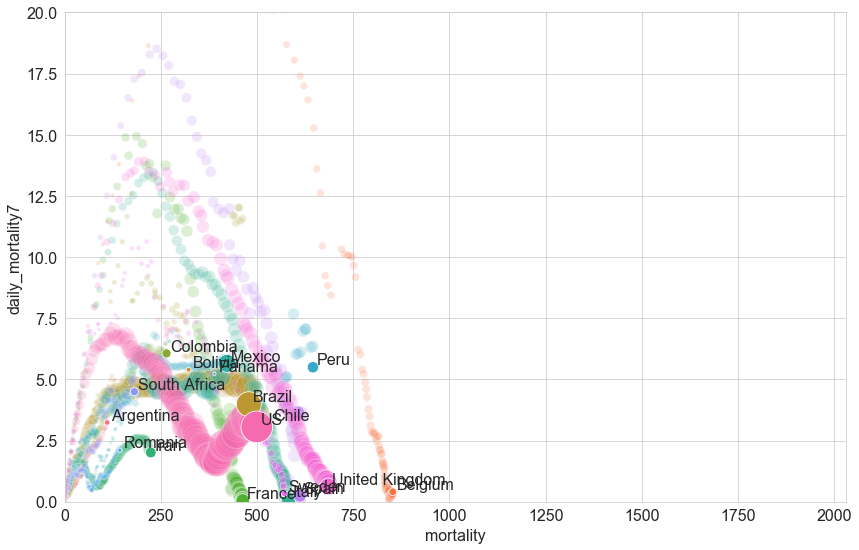

In [38]:
import seaborn as sns
# sns.set()
world_hit = world.sel(location=(((world['daily_mortality7'].isel(time=-1) > 2.) | (world['mortality'] > 400).any('time')) & (world['deaths'] > 1000)).any('time')).to_dataframe().reset_index()
ax = sns.scatterplot(x="mortality", y="daily_mortality7", hue="location", size="deaths", data=world_hit, alpha=0.2, sizes=(10, 1_000), legend=False)
ax = sns.scatterplot(x="mortality", y="daily_mortality7", hue="location", size="deaths", data=world_hit[world_hit['time']==world_hit['time'].max()], sizes=(10, 1_000), legend=False)
_ = ax.set(ylim=(0, 20), xlim=(0, 2030))
for index in world_hit[world_hit['time']==world_hit['time'].max()].index:
    record = world_hit.loc[index]
    if record['daily_mortality7'] > 20:
        continue
    ax.annotate(record['location'], (record['mortality'] + 10, record['daily_mortality7'] + .1))

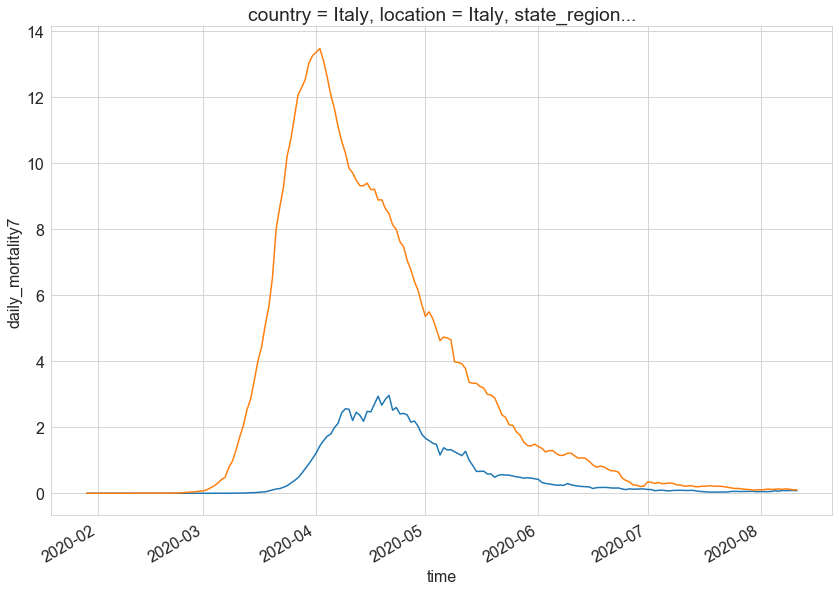

In [41]:
world.sel(location='Germany')['daily_mortality7'].plot()
world.sel(location='Italy')['daily_mortality7'].plot()

In [26]:
DAY = np.timedelta64(24 * 60 * 60, 's')
PALETTE_ONE = list(sns.color_palette())

SHOWUNTIL = np.datetime64(world.time.values[-1], 's') + 10 * DAY

EXTENT = ('2020-02-20', SHOWUNTIL)
XLIM = tuple(map(np.datetime64, EXTENT))
XLIM_S = tuple([np.datetime64(d) + 10 * DAY for d in EXTENT])

In [11]:
PARAMS = {
    'China / Hubei': -36,
    'Iran': -2,
    'Korea, South': -1,
    'Italy': 0,
#     'EU': 0,
    'Spain': 5,
    'France': 11,
    'US': 12,
    'Japan': 13,
    'United Kingdom': 14,
    'Netherlands': 16,
    'Germany': 18,
    'Switzerland': 18,
    'Philippines': 18,
    'Indonesia': 19,
    'Belgium': 20,
    'Turkey': 21,
    'Brazil': 21,
    'Sweden': 23,
    'Algeria': 23,
    'Austria': 24,
    'Portugal': 24,
    'Ecuador': 24,
    'India': 29,
    'Canada / Ontario': 29,
    'Canada / Quebec': 30,
    'Mexico': 31,
    'Russia': 33,
}

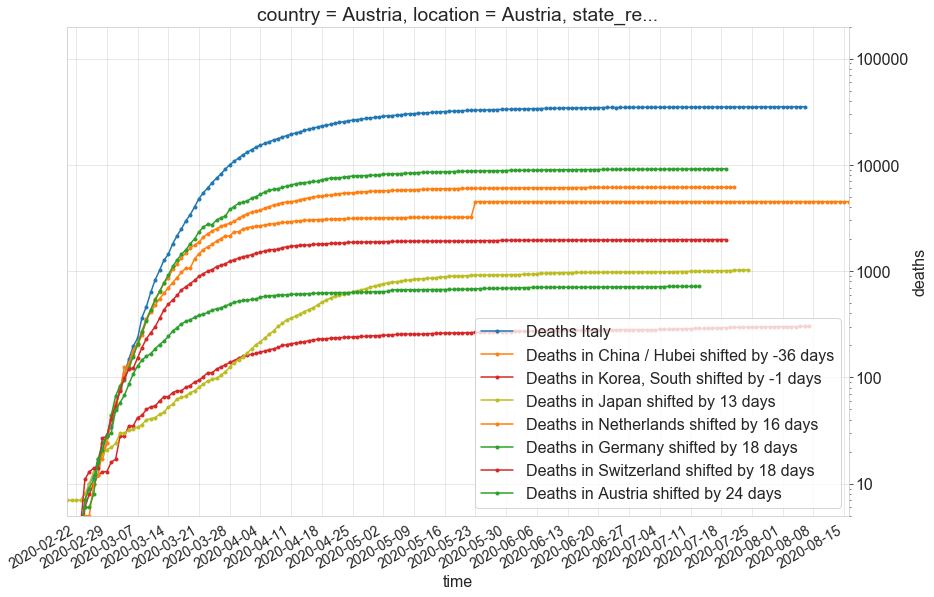

In [12]:
_, ax = covid19.plot.subplots(subplot_kw={'yscale': 'log', 'ylim': (5, 200000), 'xlim': XLIM}, figsize=(14, 9))
covid19.plot.plot_data(ax, world.sel(location='Italy')['deaths'], label=f'Deaths Italy', color=PALETTE_ONE[0])
for (country, delay), color in zip(PARAMS.items(), itertools.cycle(PALETTE_ONE[1:])):
    if country not in ['Germany', 'Switzerland', 'Austria', 'Netherlands', 'Korea, South', 'Japan', 'China / Hubei']:
        continue
    covid19.plot.plot_data(ax, world.sel(location=country)['deaths'], label=f'Deaths in {country} shifted by {delay} days', delay=-delay, color=color)
_ = ax.legend()

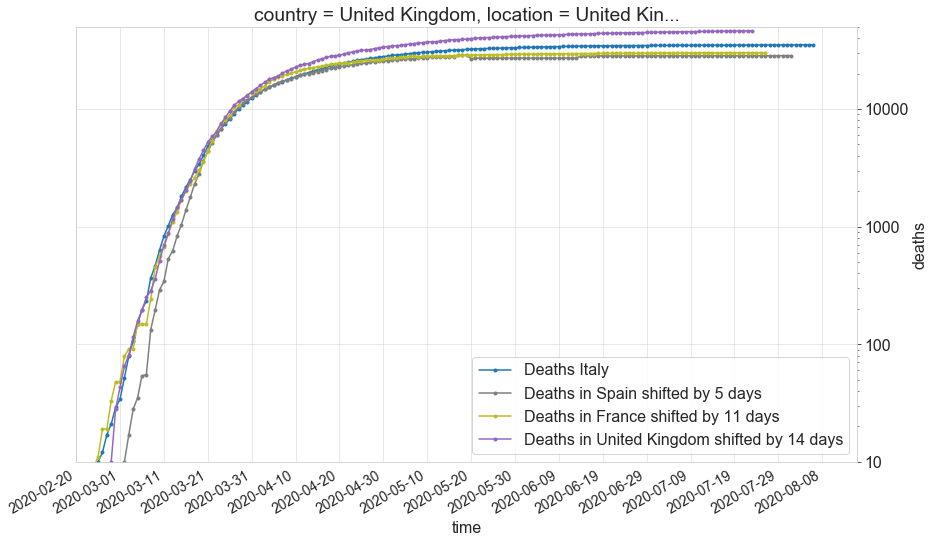

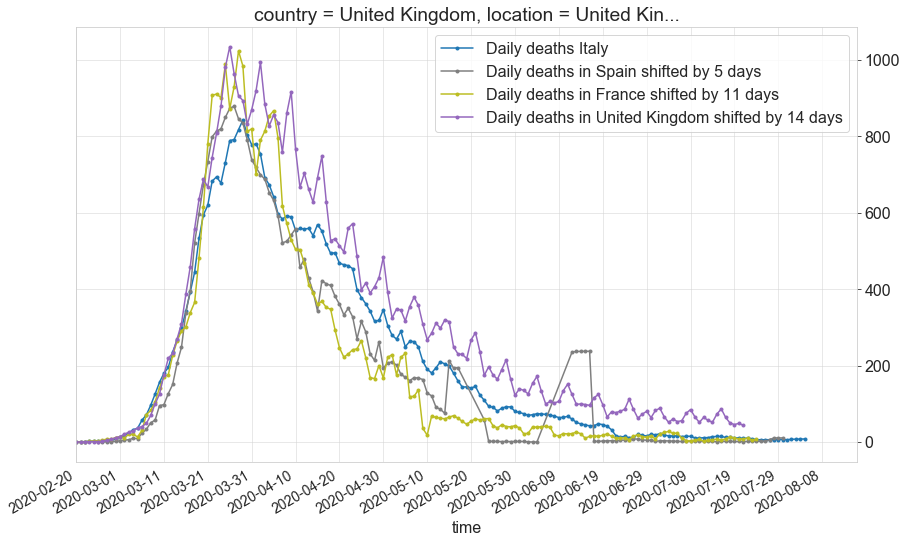

In [13]:
_, ax = covid19.plot.subplots(subplot_kw={
    'yscale': 'log',
    'ylim': (10, 50000),
    # 'ylim': (0, country_data['France']['deaths'].max() * 1.1),
    'xlim': XLIM
}, figsize=(14, 8))
_, ax1 = covid19.plot.subplots(subplot_kw={
    'xlim': XLIM
}, figsize=(14, 8))

covid19.plot.plot_data(ax, world.sel(location='Italy')['deaths'], label=f'Deaths Italy', color=PALETTE_ONE[0])
covid19.plot.plot_data(ax1, world.sel(location='Italy')['daily_deaths'].rolling({'time': 5}, center=True).mean(), label=f'Daily deaths Italy', color=PALETTE_ONE[0])
for (country, delay), color in zip(PARAMS.items(), itertools.cycle(PALETTE_ONE[3:])):
    if country not in ['France', 'United Kingdom', 'Spain']:
        continue
    covid19.plot.plot_data(ax, world.sel(location=country)['deaths'], label=f'Deaths in {country} shifted by {delay} days', delay=-delay, color=color, date_interval=10)
    covid19.plot.plot_data(ax1, world.sel(location=country)['daily_deaths'].rolling({'time': 5}, center=True).mean(), label=f'Daily deaths in {country} shifted by {delay} days', delay=-delay, color=color, date_interval=10)
_ = ax.legend()
_ = ax1.legend()

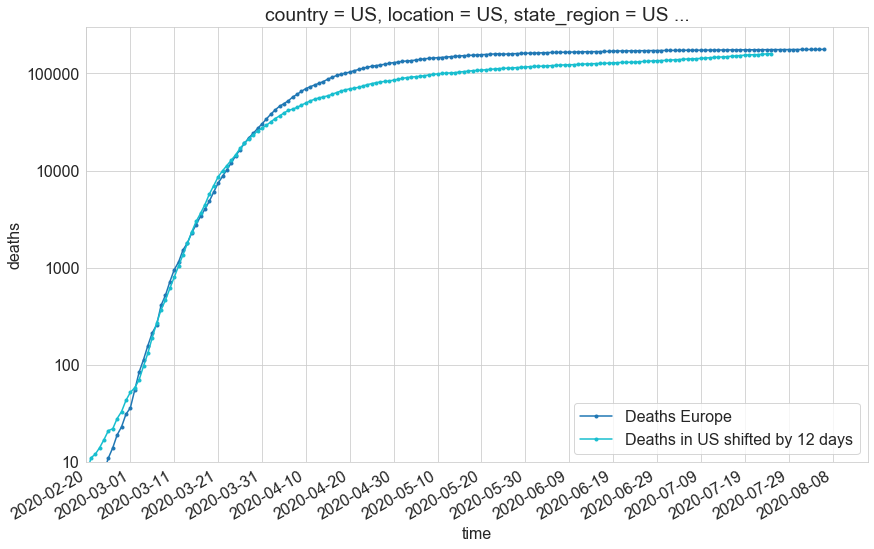

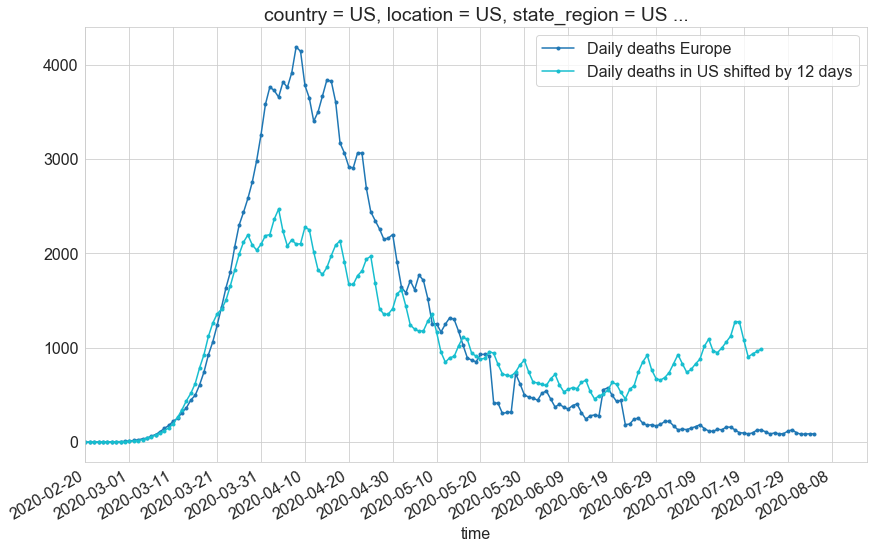

In [14]:
_, ax = plt.subplots(subplot_kw={
    'yscale': 'log',
    'ylim': (10, 300000),
    # 'ylim': (0, country_data['France']['deaths'].max() * 1.1),
    'xlim': XLIM
}, figsize=(14, 8))
_, ax1 = plt.subplots(subplot_kw={
    'xlim': XLIM
}, figsize=(14, 8))

covid19.plot.plot_data(ax, europe['deaths'], label=f'Deaths Europe', color=PALETTE_ONE[0])
covid19.plot.plot_data(ax1, europe['daily_deaths'].rolling({'time': 5}, center=True).mean(), label=f'Daily deaths Europe', color=PALETTE_ONE[0])
for (country, delay), color in zip(PARAMS.items(), itertools.cycle(PALETTE_ONE[3:])):
    if country not in ['US']:
        continue
    covid19.plot.plot_data(ax, world.sel(location=country)['deaths'], label=f'Deaths in {country} shifted by {delay} days', delay=-delay, color=color, date_interval=10)
    covid19.plot.plot_data(ax1, world.sel(location=country)['daily_deaths'].rolling({'time': 5}, center=True).mean(), label=f'Daily deaths in {country} shifted by {delay} days', delay=-delay, color=color, date_interval=10)
_ = ax.legend()
_ = ax1.legend()

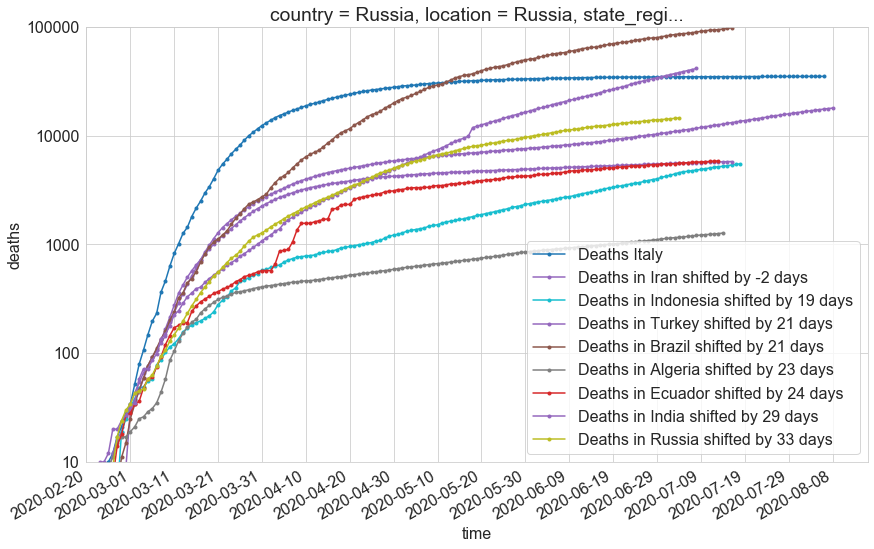

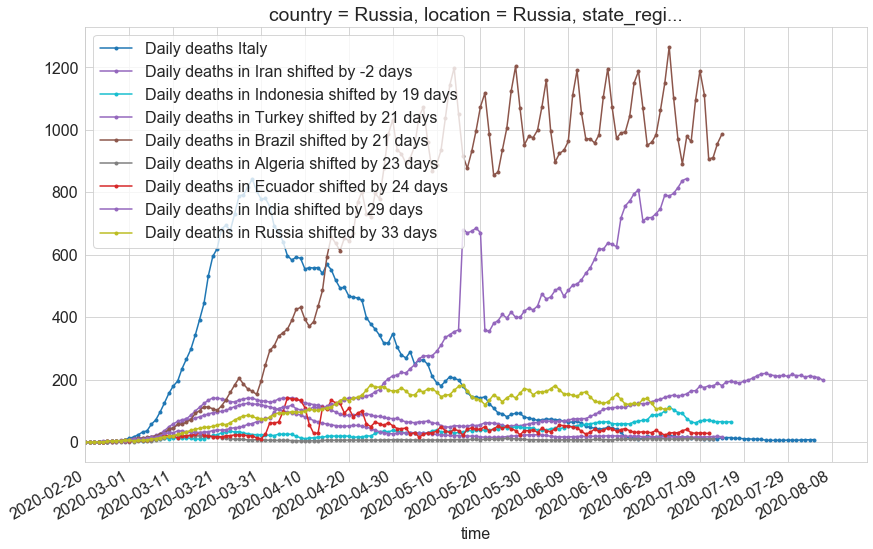

In [15]:
_, ax = plt.subplots(subplot_kw={
    'yscale': 'log',
    'ylim': (10, 100000),
    # 'ylim': (0, country_data['France']['deaths'].max() * 1.1),
    'xlim': XLIM
}, figsize=(14, 8))
_, ax1 = plt.subplots(subplot_kw={
    'xlim': XLIM
}, figsize=(14, 8))

covid19.plot.plot_data(ax, world.sel(location='Italy')['deaths'], label=f'Deaths Italy', color=PALETTE_ONE[0])
covid19.plot.plot_data(ax1, world.sel(location='Italy')['daily_deaths'].rolling({'time': 5}, center=True).mean(), label=f'Daily deaths Italy', color=PALETTE_ONE[0])
for (country, delay), color in zip(PARAMS.items(), itertools.cycle(PALETTE_ONE[3:])):
    if country not in ['Iran', 'Brazil', 'Turkey', 'India', 'Indonesia', 'Ecuador', 'Algeria', 'Russia']:
        continue
    covid19.plot.plot_data(ax, world.sel(location=country)['deaths'], label=f'Deaths in {country} shifted by {delay} days', delay=-delay, color=color, date_interval=10)
    covid19.plot.plot_data(ax1, world.sel(location=country)['daily_deaths'].rolling({'time': 5}, center=True).mean(), label=f'Daily deaths in {country} shifted by {delay} days', delay=-delay, color=color, date_interval=10)
_ = ax.legend()
_ = ax1.legend()

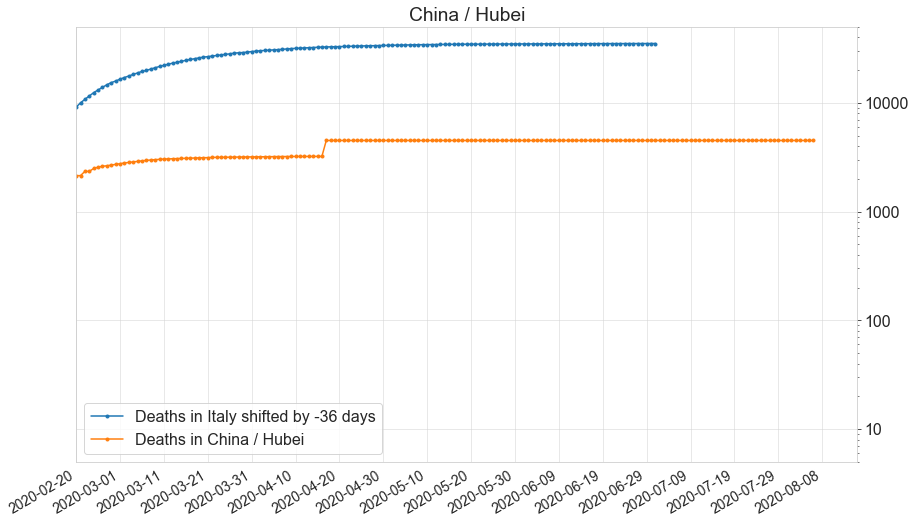

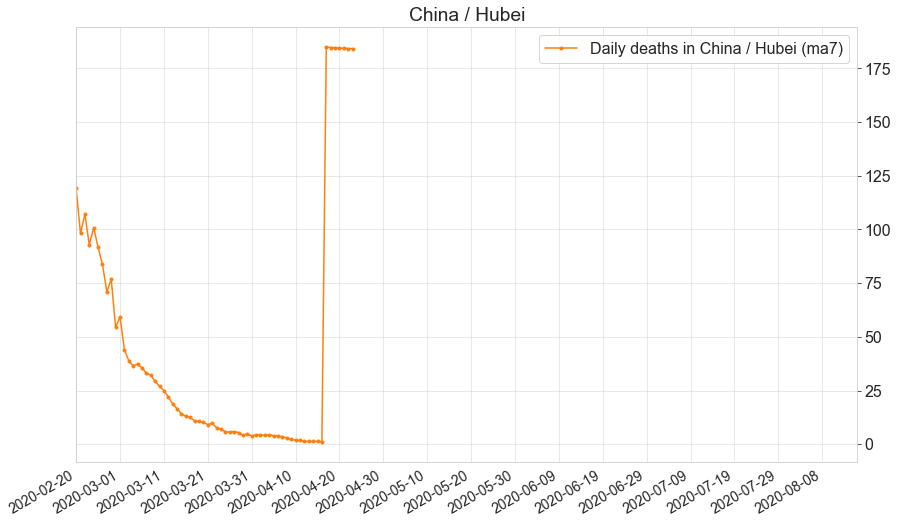

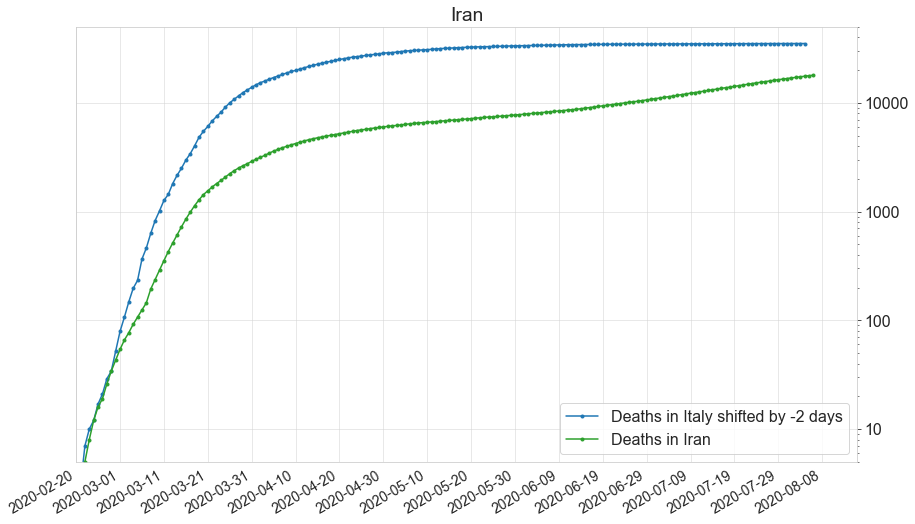

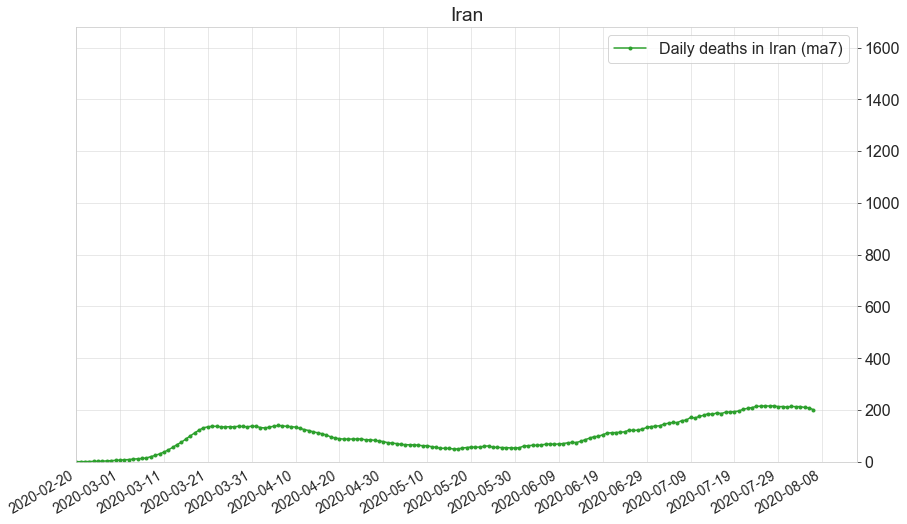

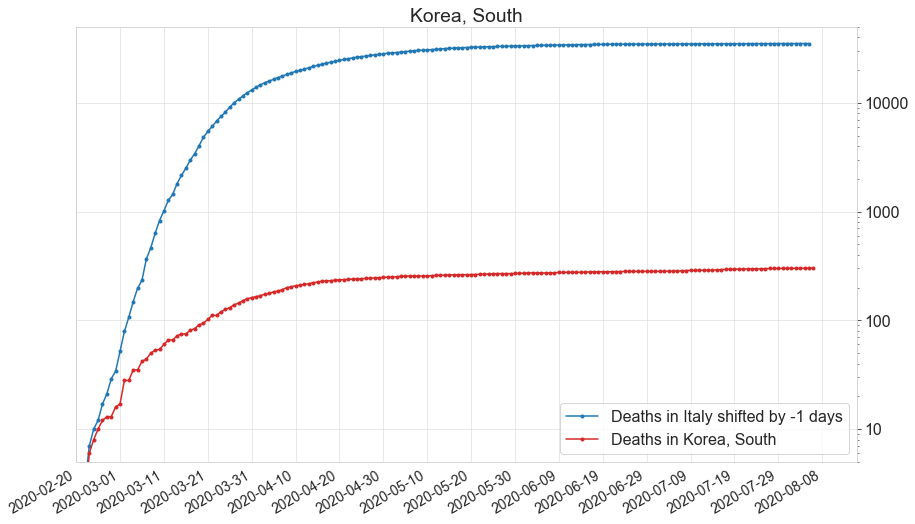

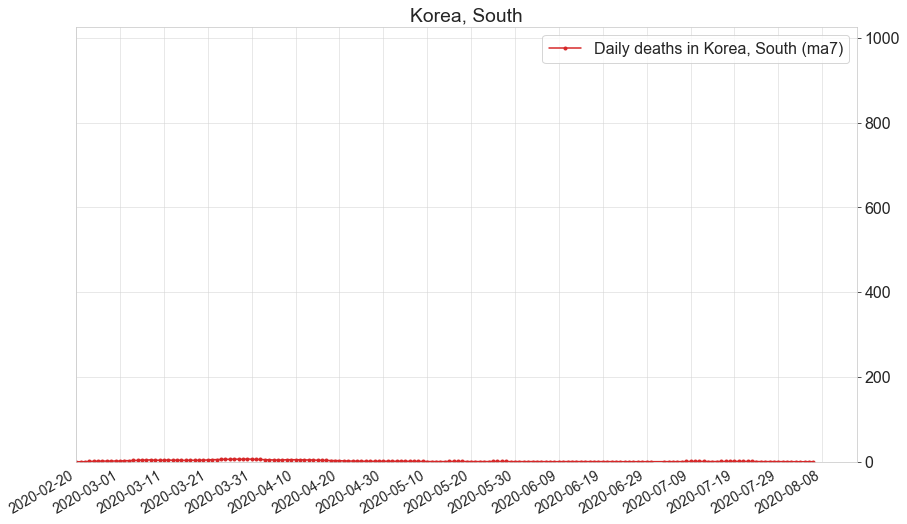

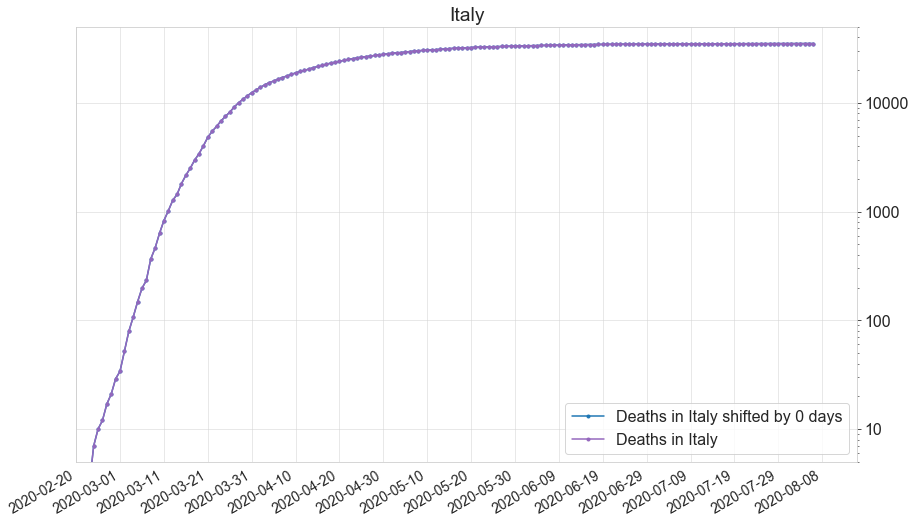

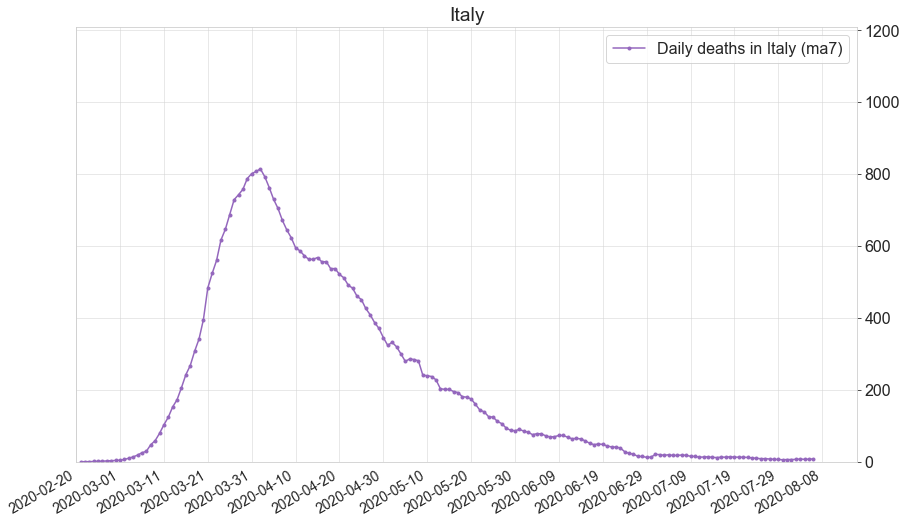

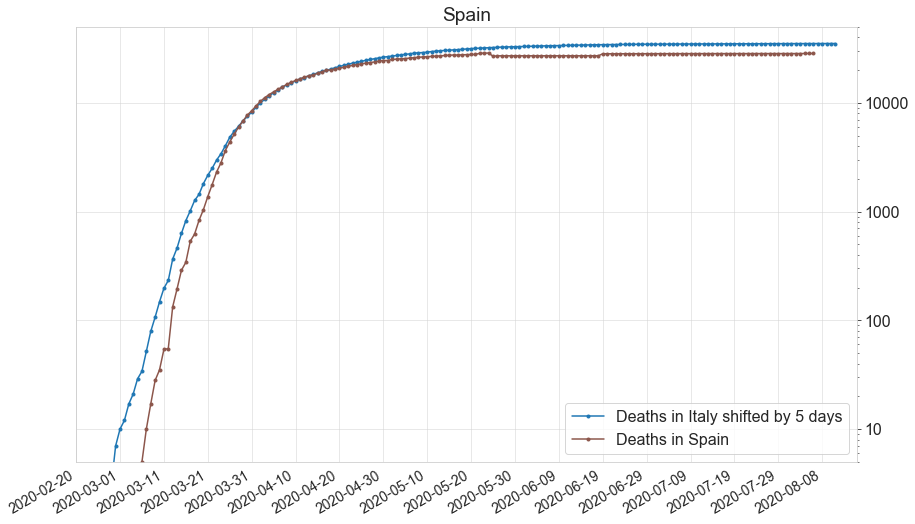

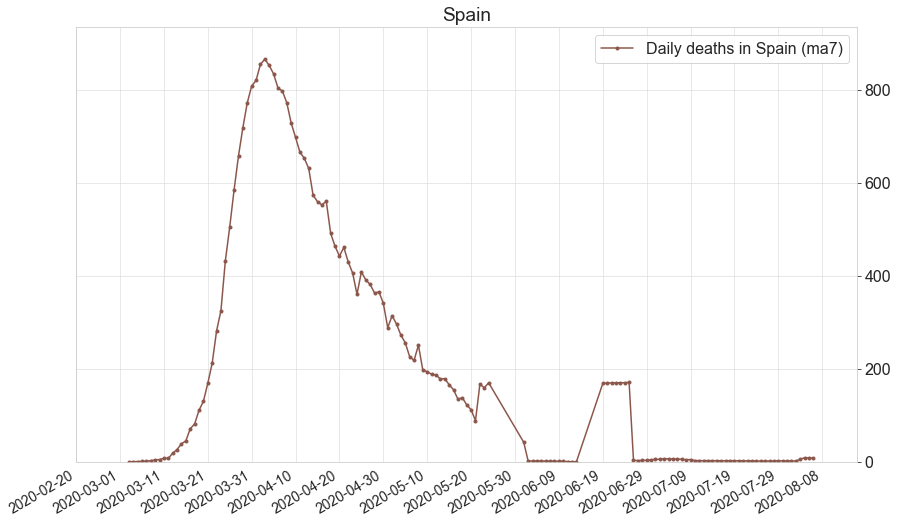

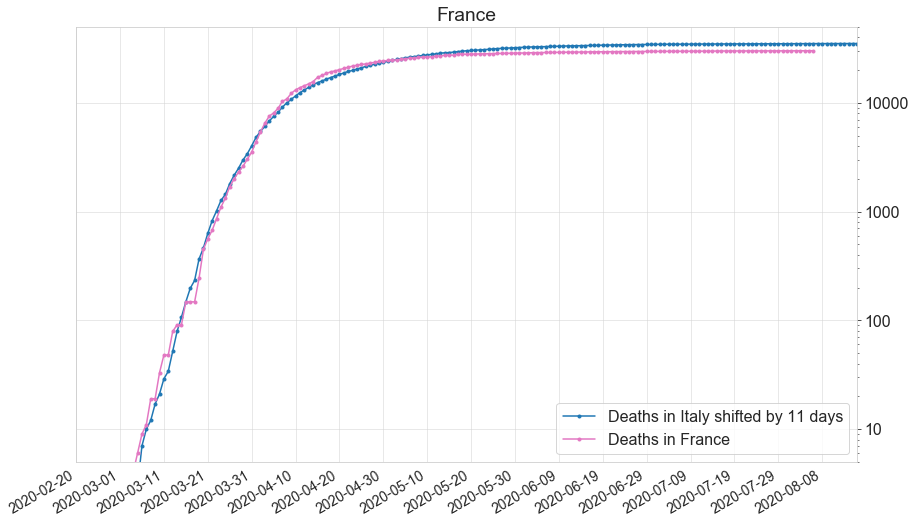

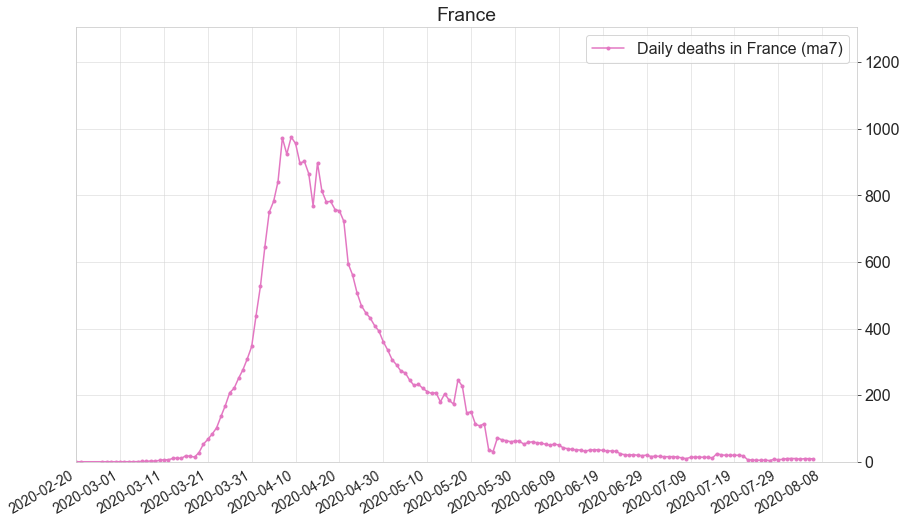

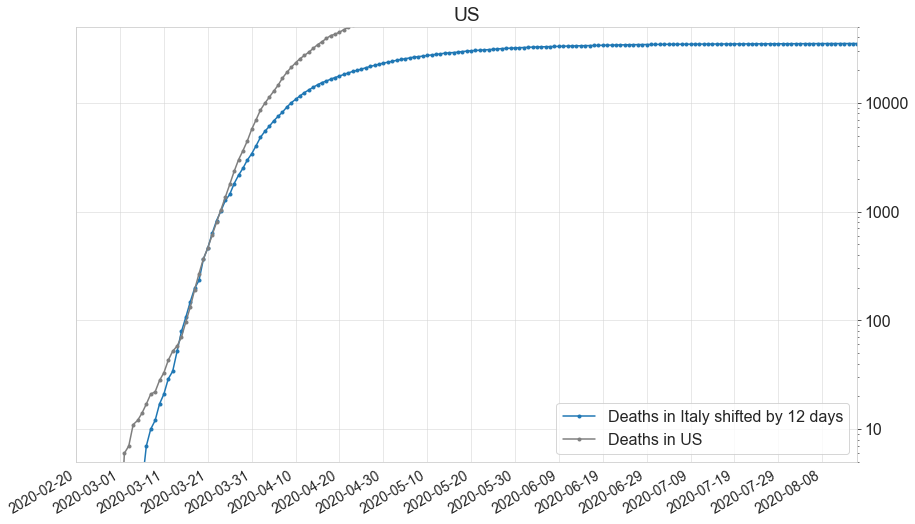

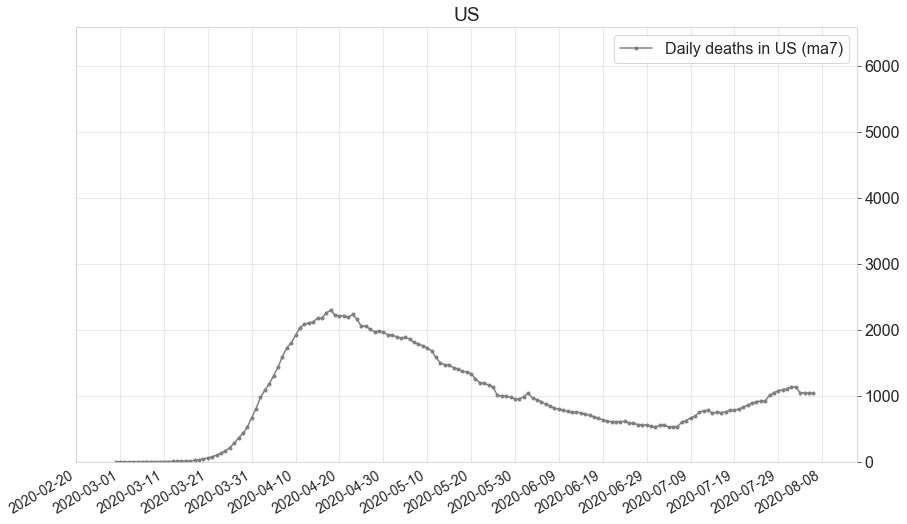

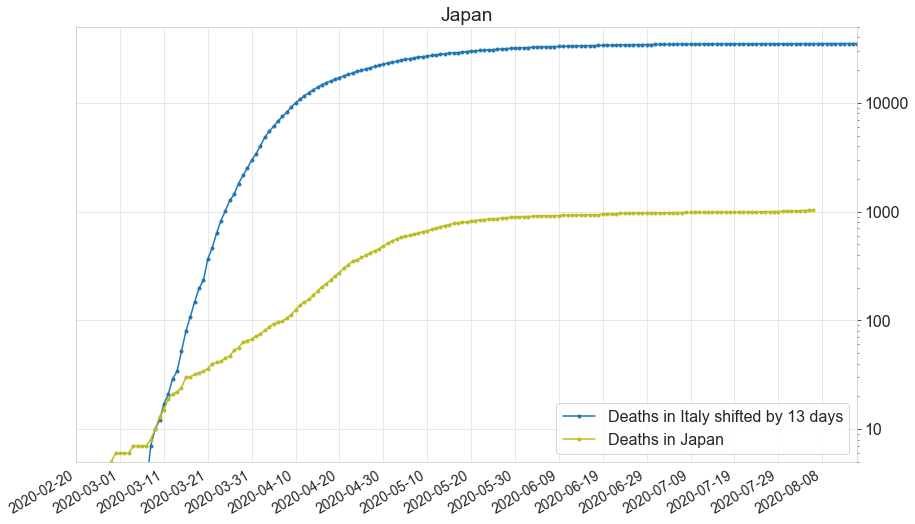

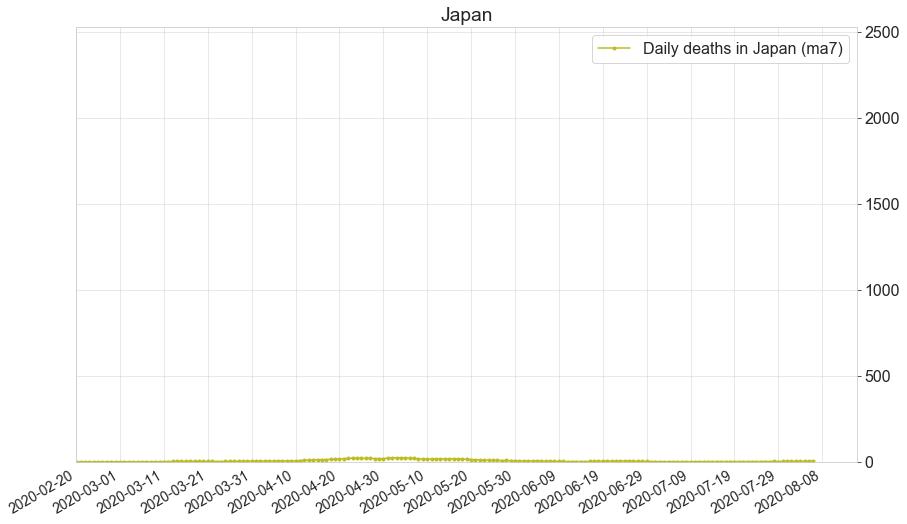

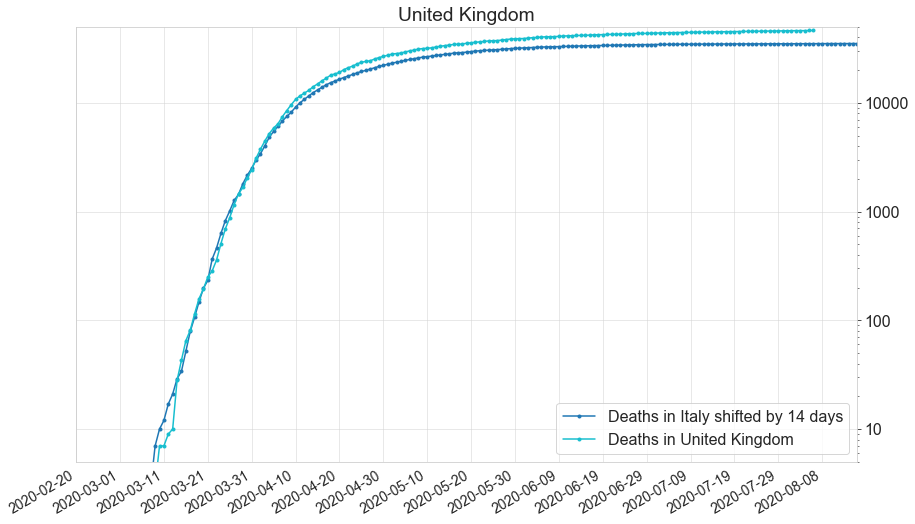

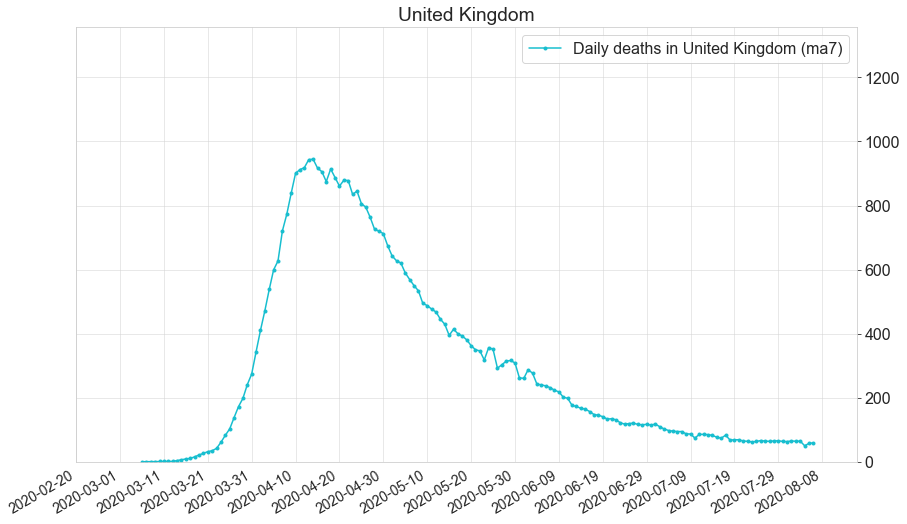

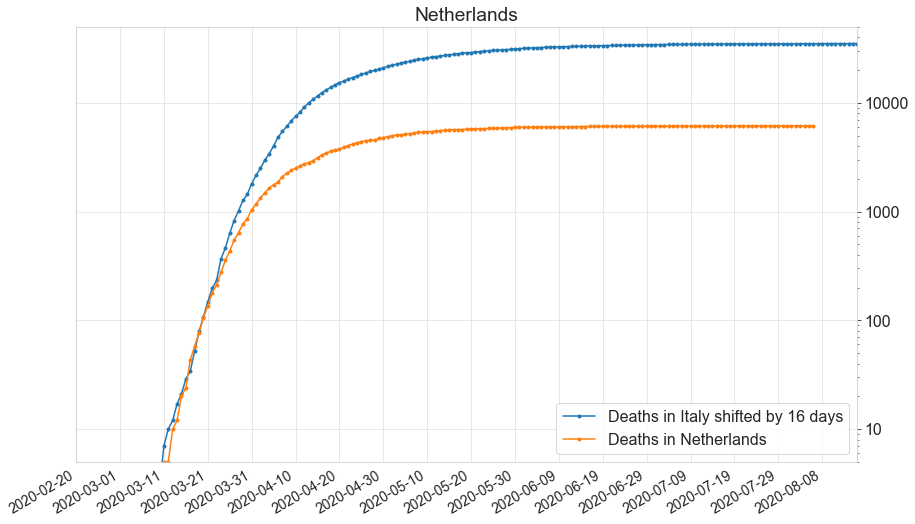

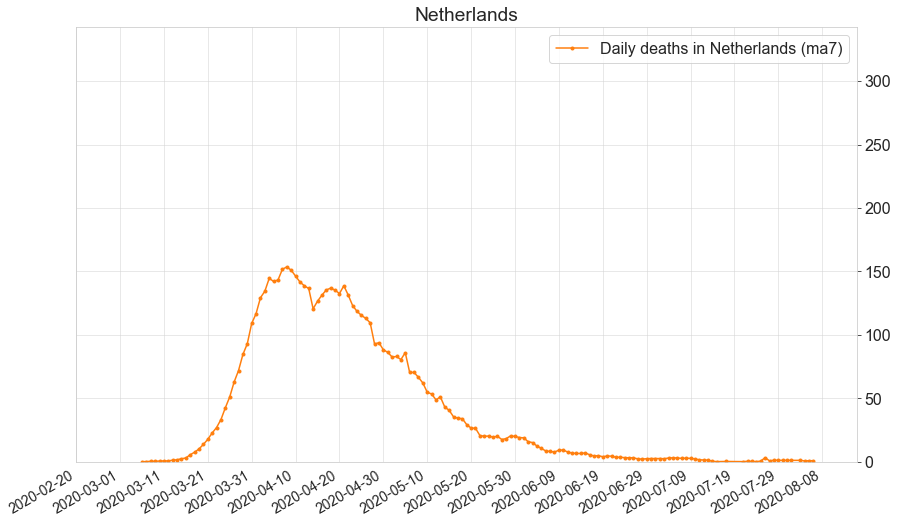

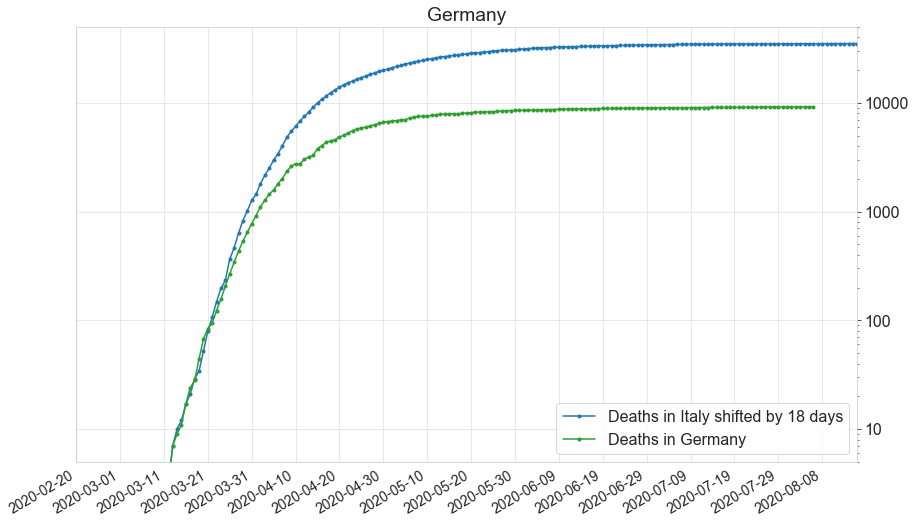

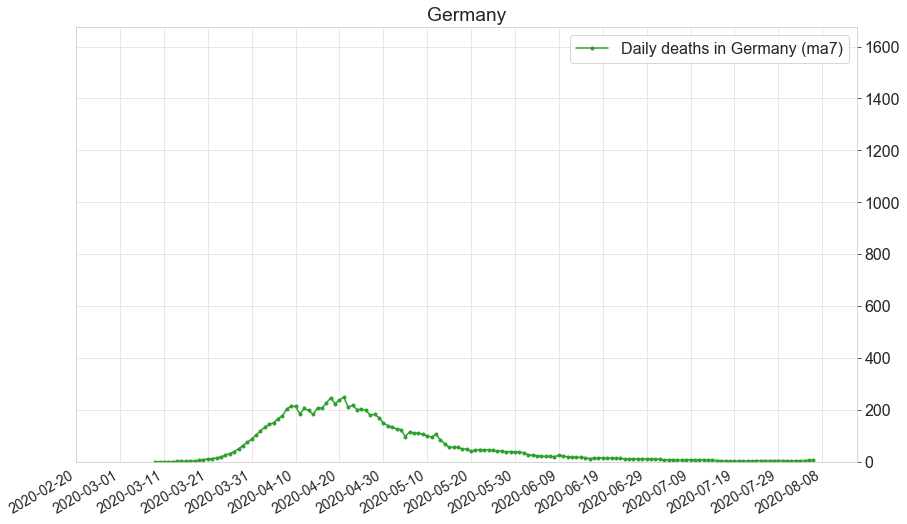

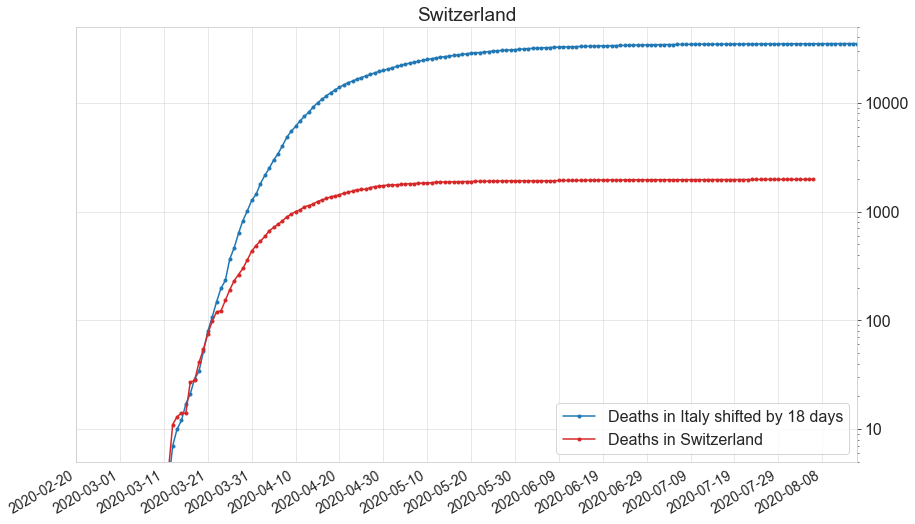

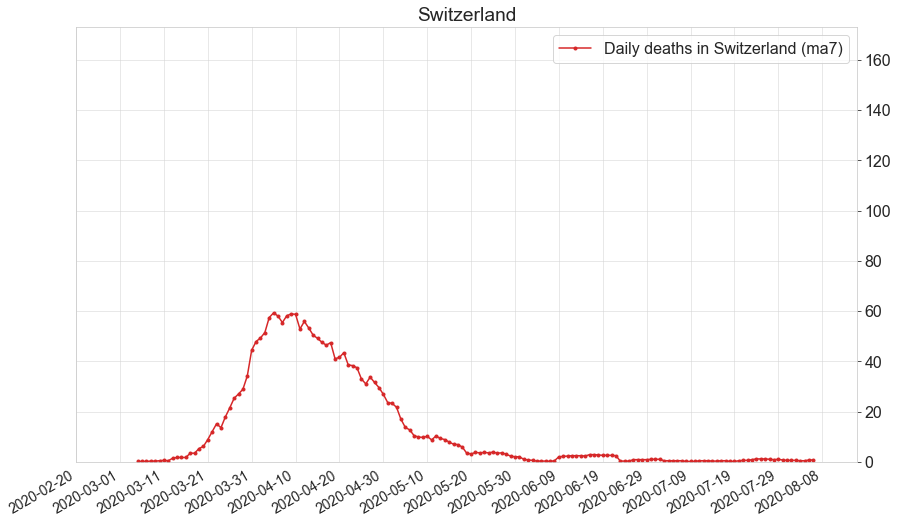

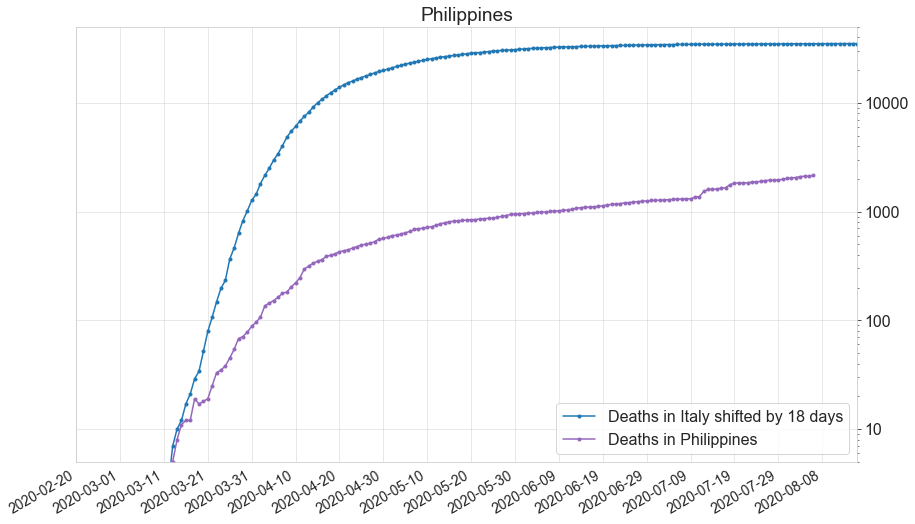

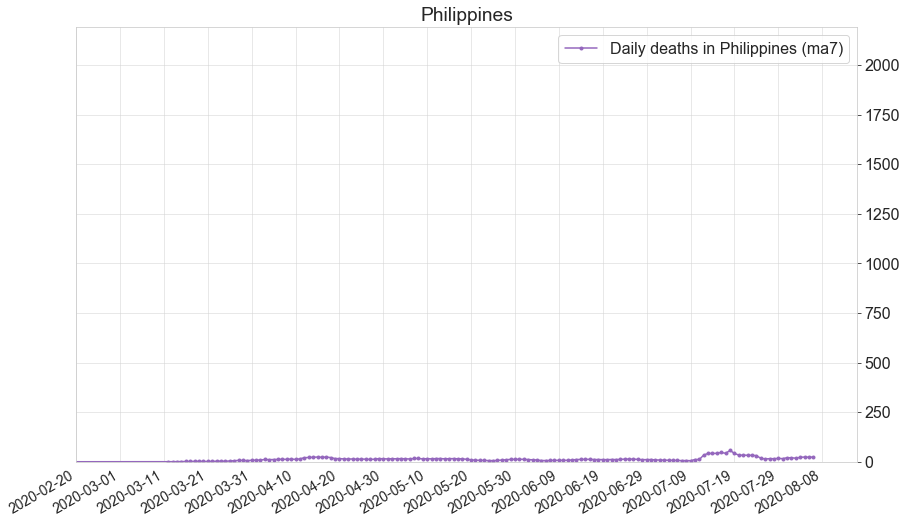

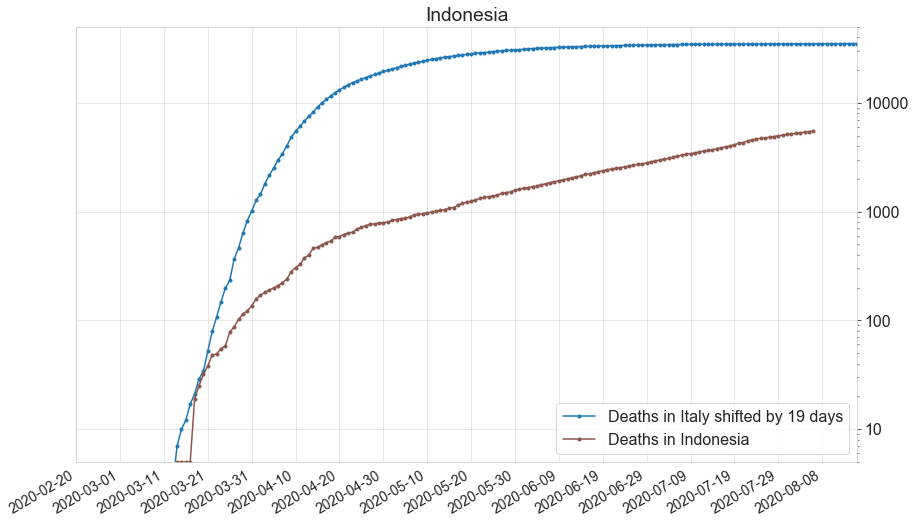

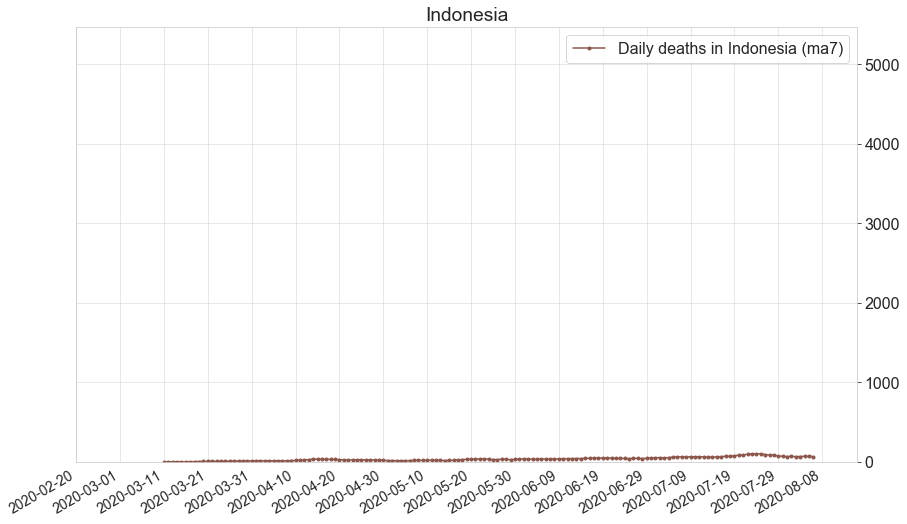

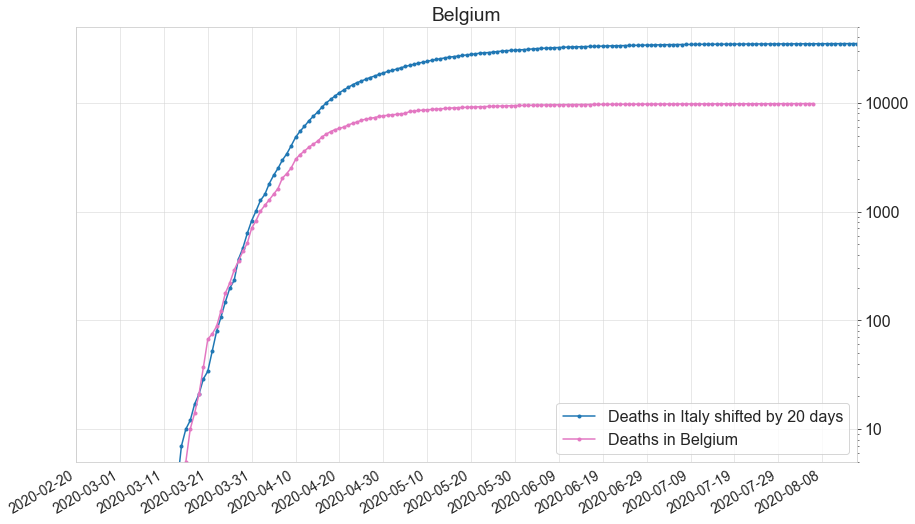

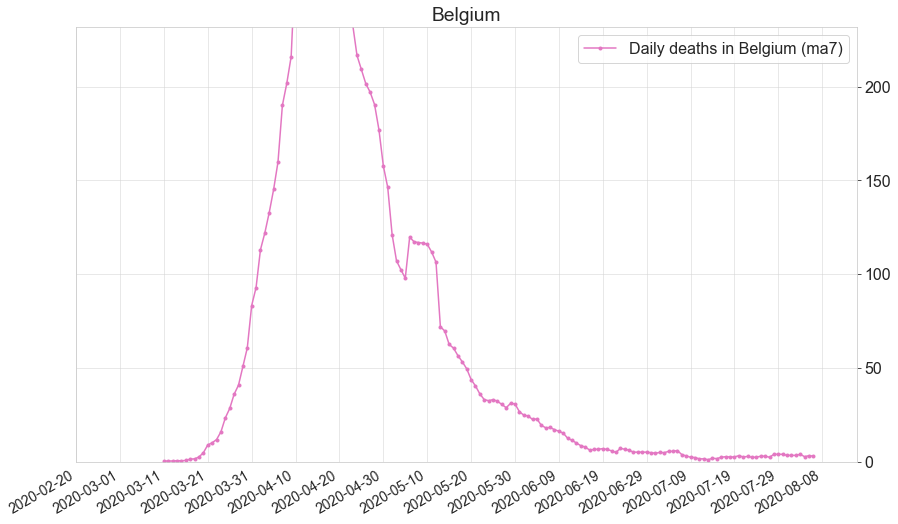

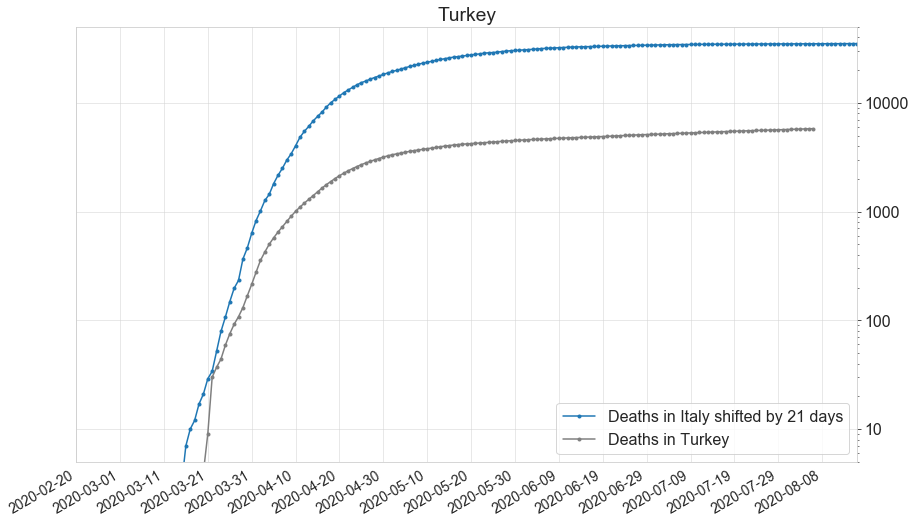

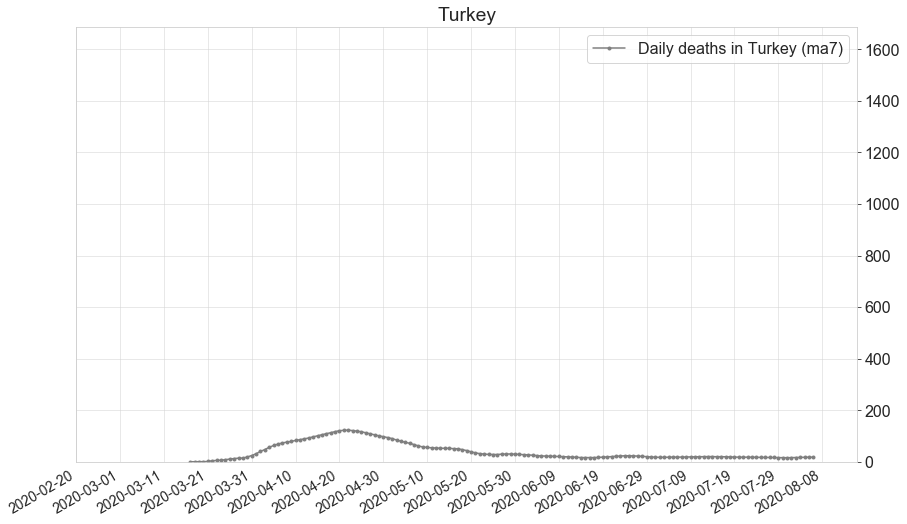

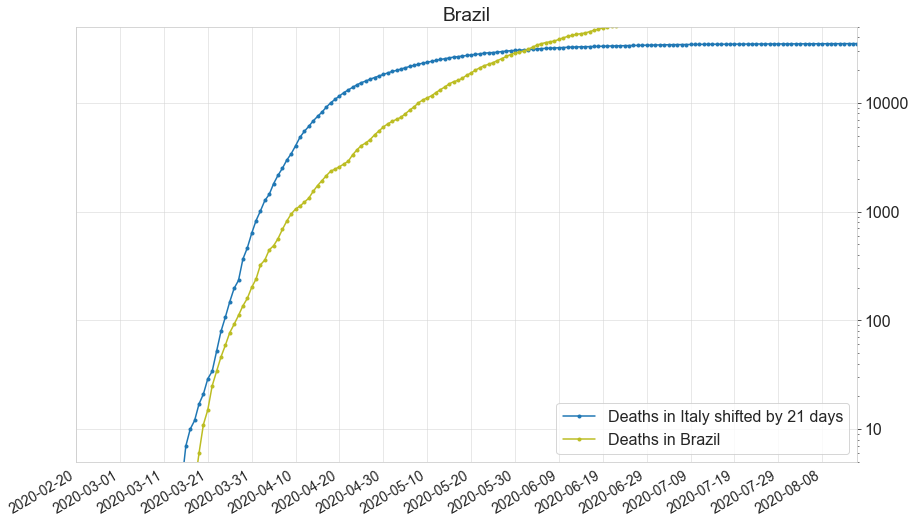

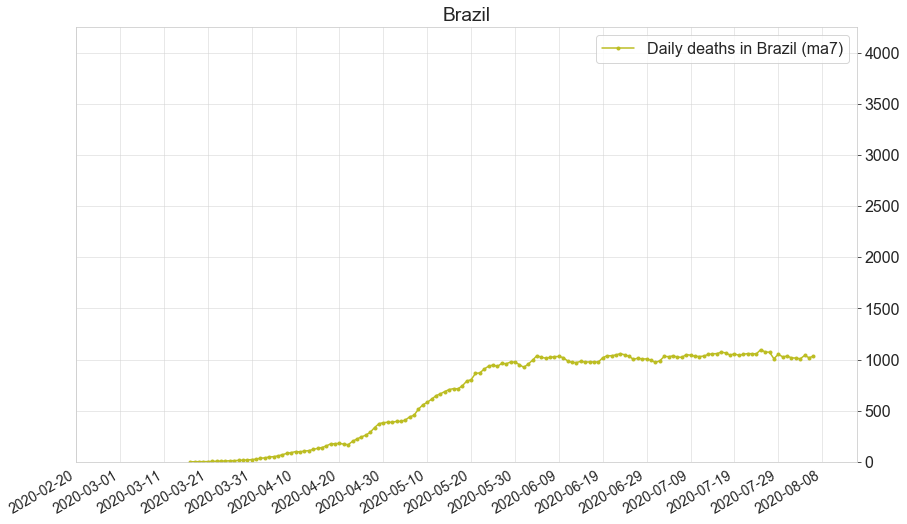

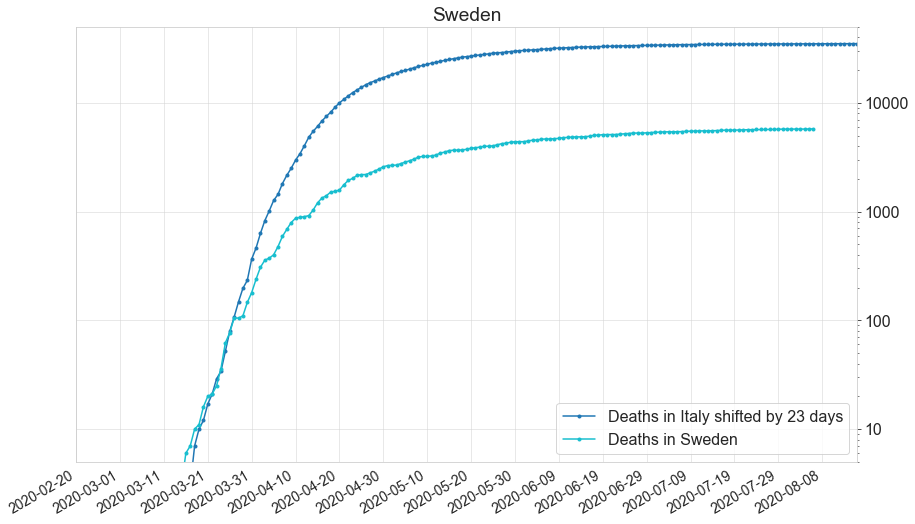

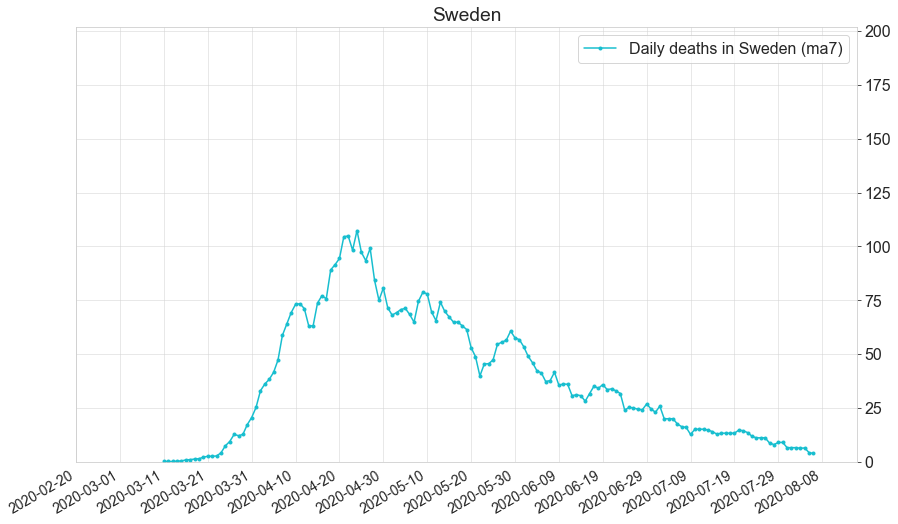

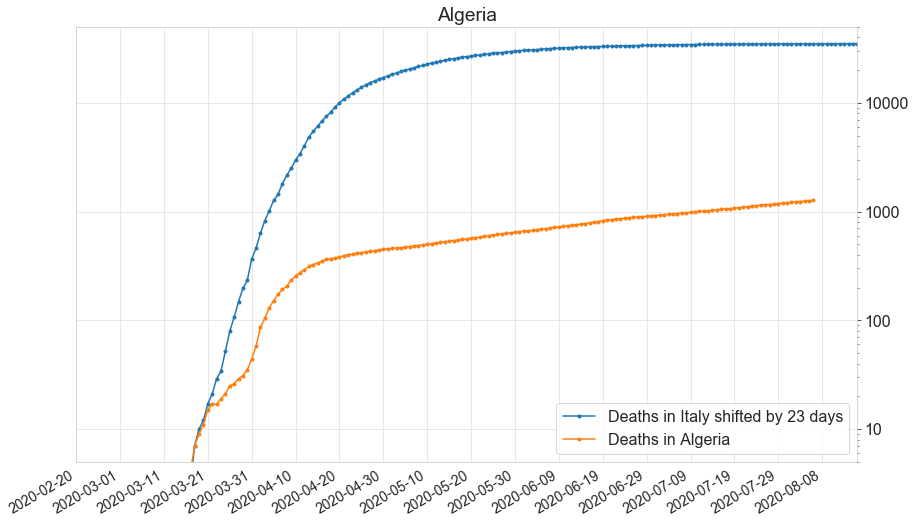

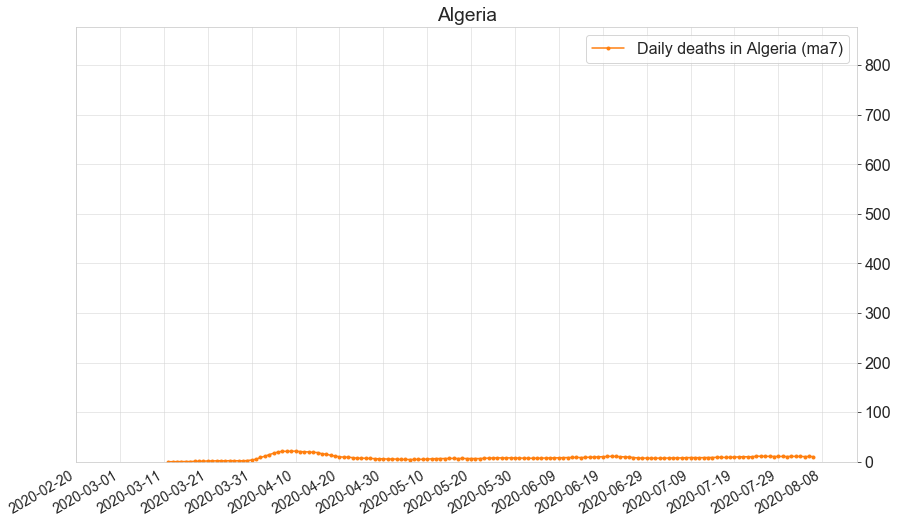

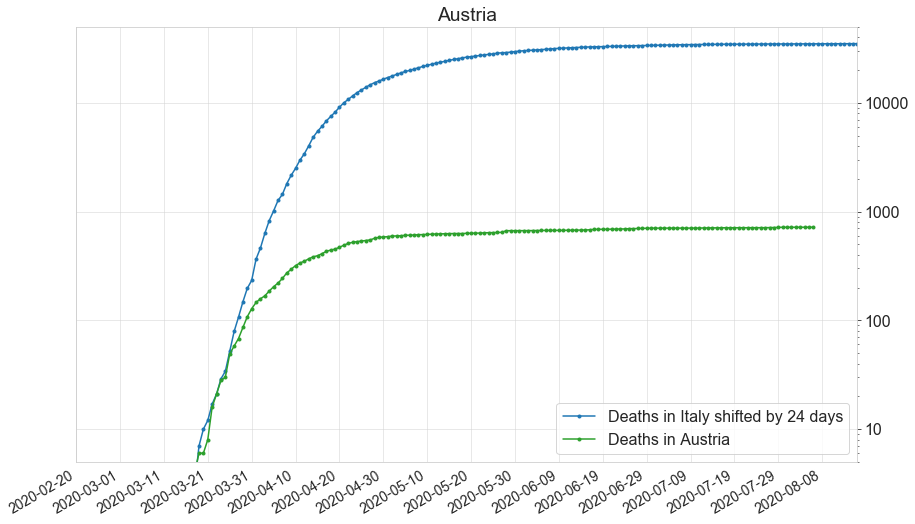

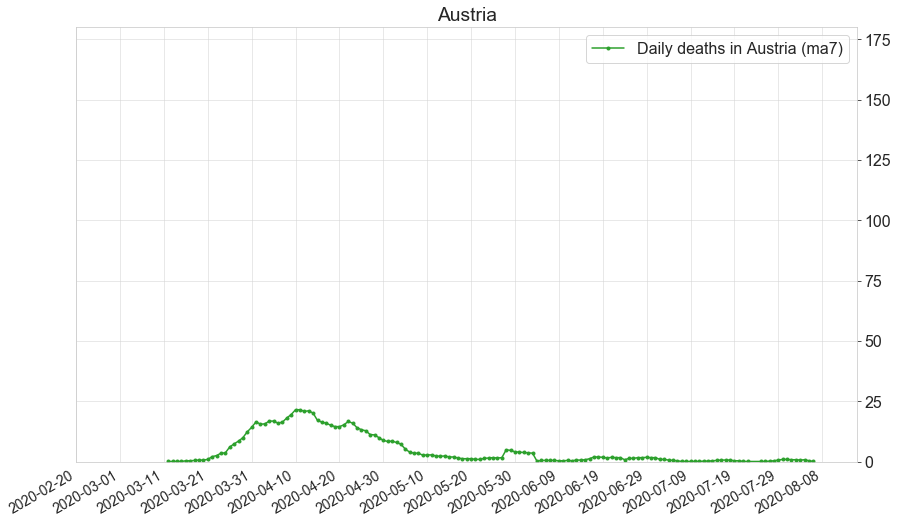

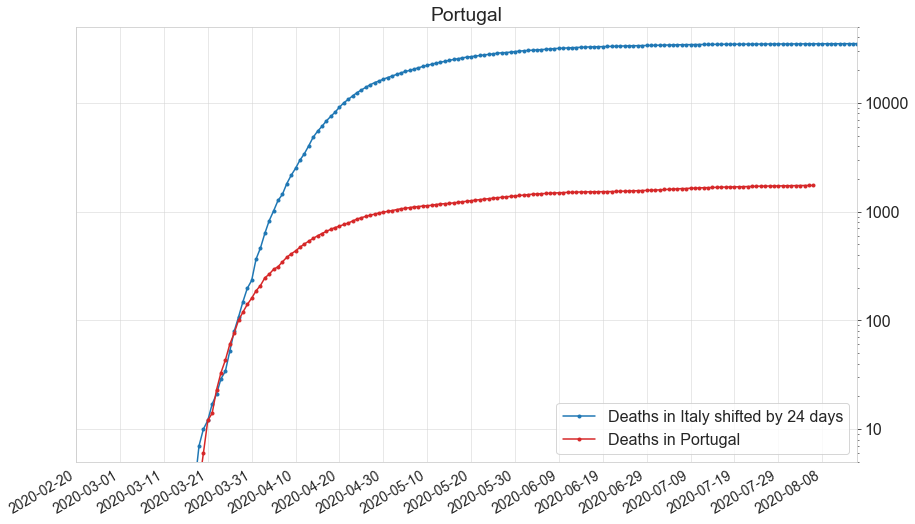

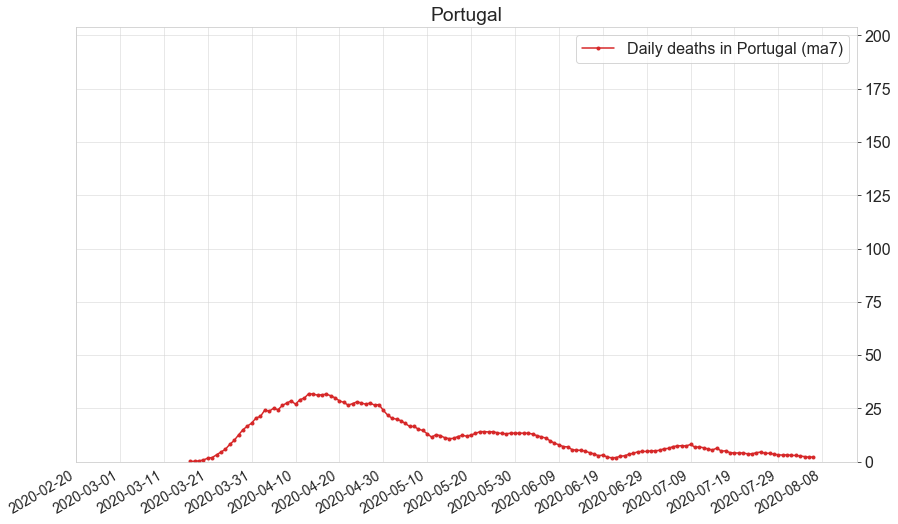

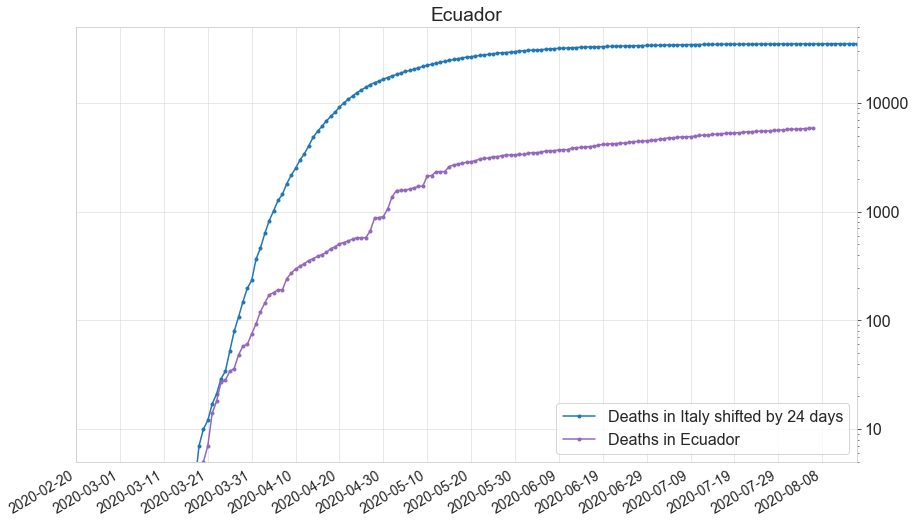

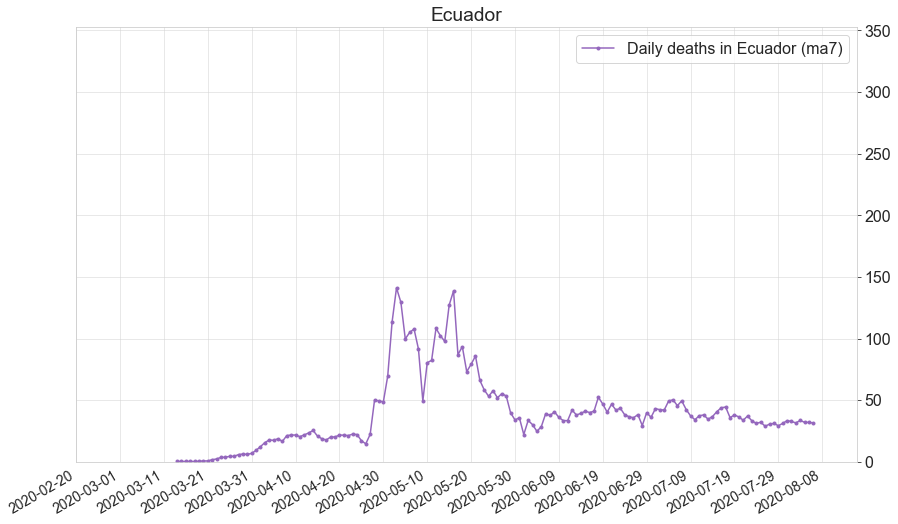

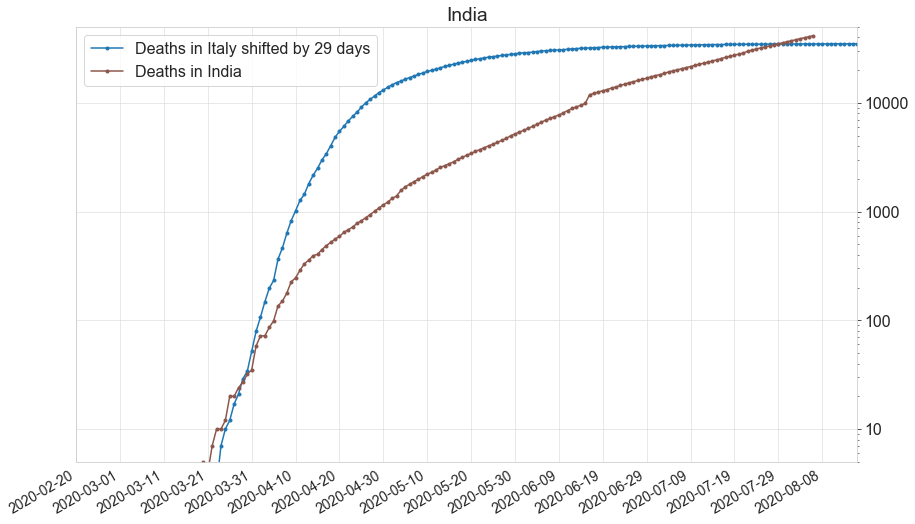

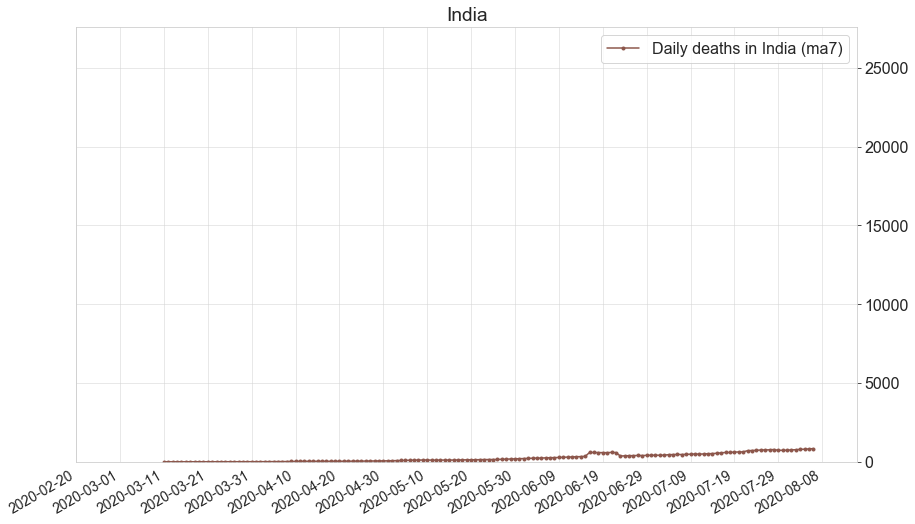

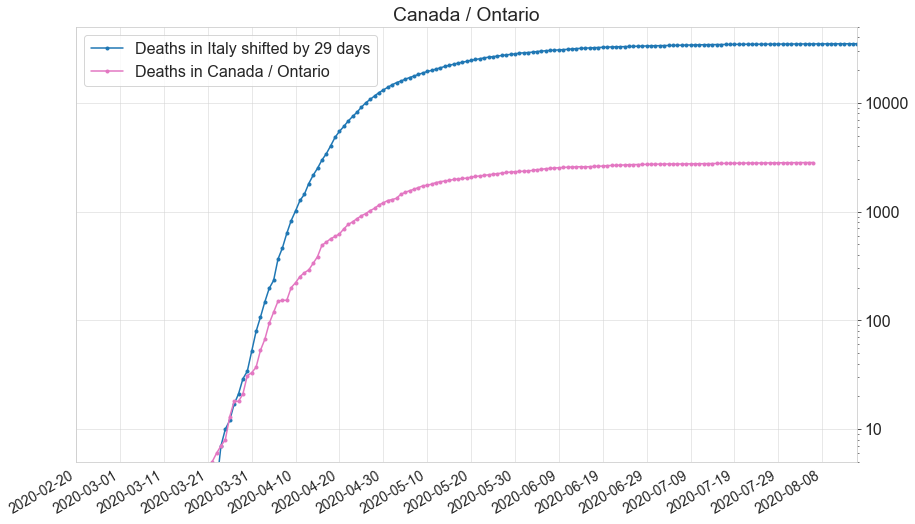

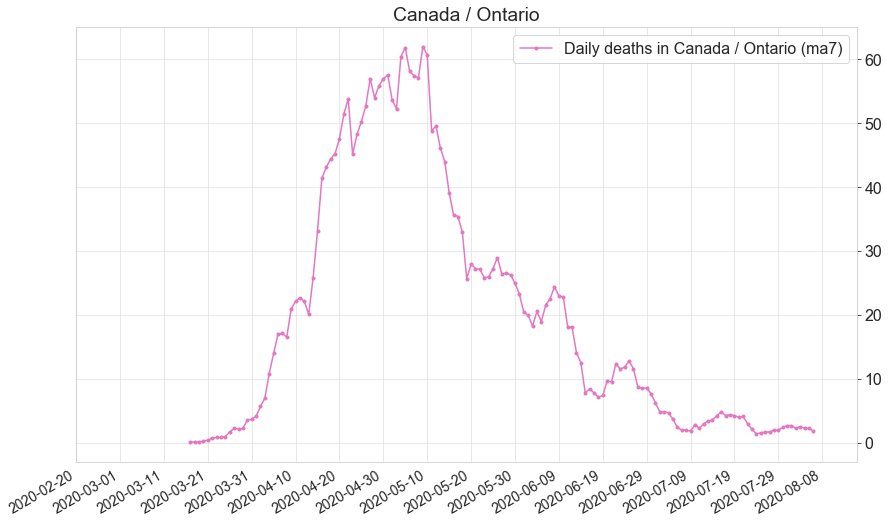

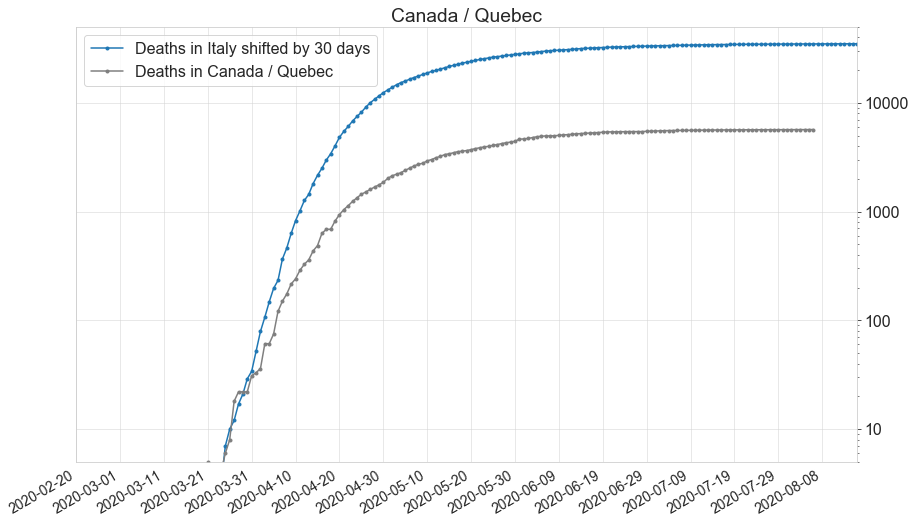

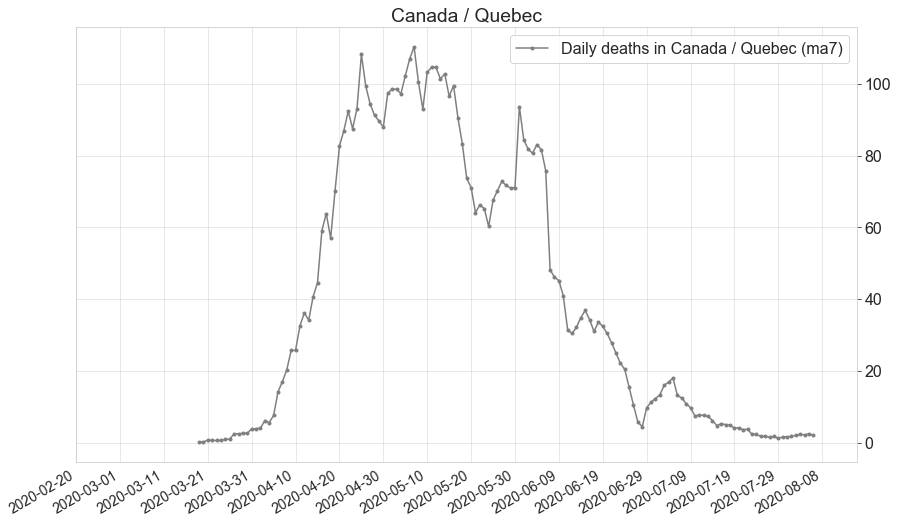

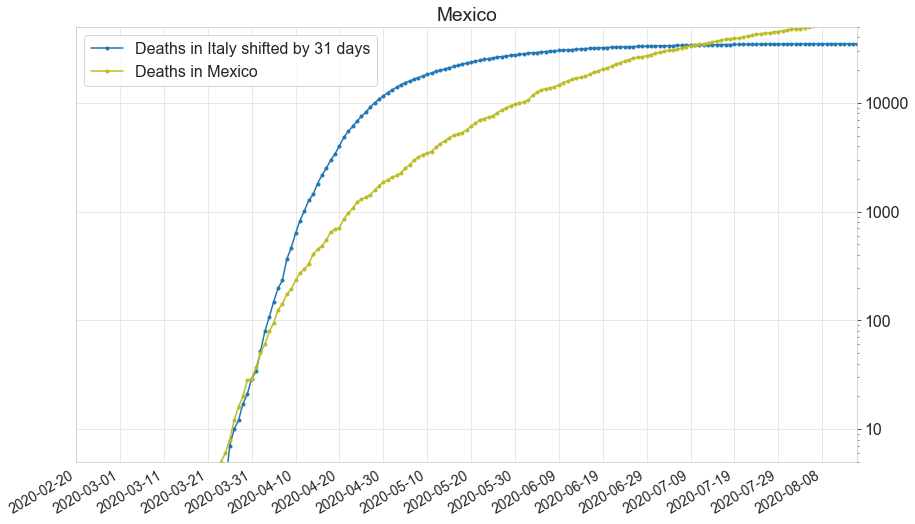

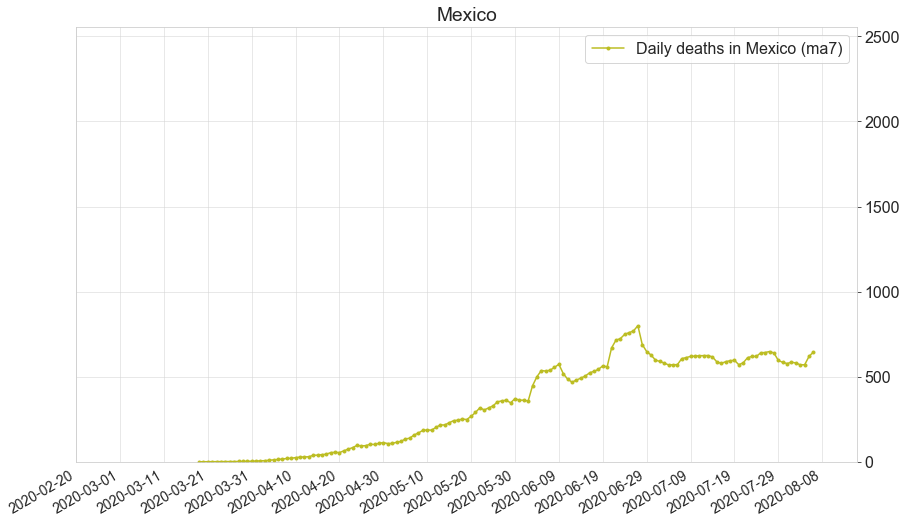

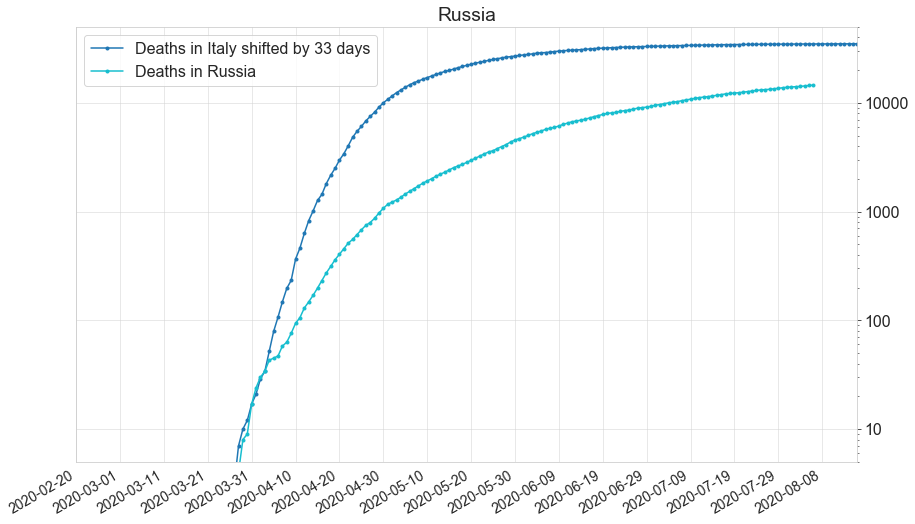

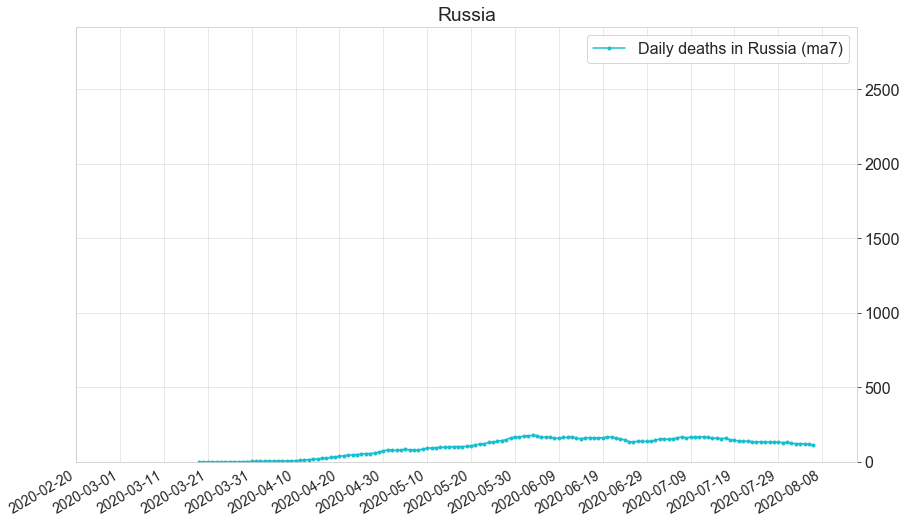

In [16]:
for (country, delay), color in list(zip(PARAMS.items(), itertools.cycle(PALETTE_ONE[1:]))):
    _, ax = covid19.plot.subplots(subplot_kw={
        'yscale': 'log',
        'ylim': (5, 50000),
        # 'ylim': (0, country_data[country]['deaths'].max() * 1.1),
        'xlim': XLIM,
    }, figsize=(14, 8))
    covid19.plot.plot_data(ax, world.sel(location='Italy')['deaths'], label=f'Deaths in Italy shifted by {delay} days', delay=delay, color=PALETTE_ONE[0])
    covid19.plot.plot_data(ax, world.sel(location=country)['deaths'], label=f'Deaths in {country}', color=color, date_interval=10)
    ax.set_title(f'{country}')
    ax.set(xlabel='', ylabel='')
    ax.legend()

    _, ax = covid19.plot.subplots(subplot_kw={
        # 'ylim': (1, 10000),
        # 'ylim': (0, country_data[country]['deaths'].max() * 1.1),
        'xlim': XLIM
    }, figsize=(14, 8))
    # covid19.plot.plot_data(ax, world.sel(location='Italy')['daily_deaths'].rolling({'time': 5}, center=True, min_periods=1).mean(), label=f'Daily deaths in Italy shifted by {delay} days', delay=delay, color=PALETTE_ONE[0])
    covid19.plot.plot_data(ax, world.sel(location=country)['daily_deaths7'], label=f'Daily deaths in {country} (ma7)', color=color, date_interval=10)
    ax.set_title(f'{country}')
    ax.set(xlabel='', ylabel='')
    ax.legend()
    try:
        ax.set(ylim=(0, world.sel(location=country).population.values / 50_000))
    except ValueError:
        pass